# ГЛАВА I. 	АНАЛИТИЧЕСКАЯ ПОДГОТОВКА ДАННЫХ

## 1.1 Первичный анализ данных

In [ ]:
import pandas as pd
import numpy as np

file_url = f'https://docs.google.com/spreadsheets/d/1nuw8x2oQEnjRsvYRWbY90a29nFphhZ5u/export?format=csv'
df = pd.read_csv(file_url)

print("="*50)
print("1. Статистическое описание выборки")
print("="*50)

# Основная информация о датафрейме
print("\nРазмер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes.value_counts())

# Пропущенные значения (общая информация)
print("\nОбщее количество пропущенных значений:", df.isnull().sum().sum())

1. Статистическое описание выборки

Размер датасета: (1001, 214)

Типы данных:
int64     107
object    107
Name: count, dtype: int64

Общее количество пропущенных значений: 36


### Биологическая активность

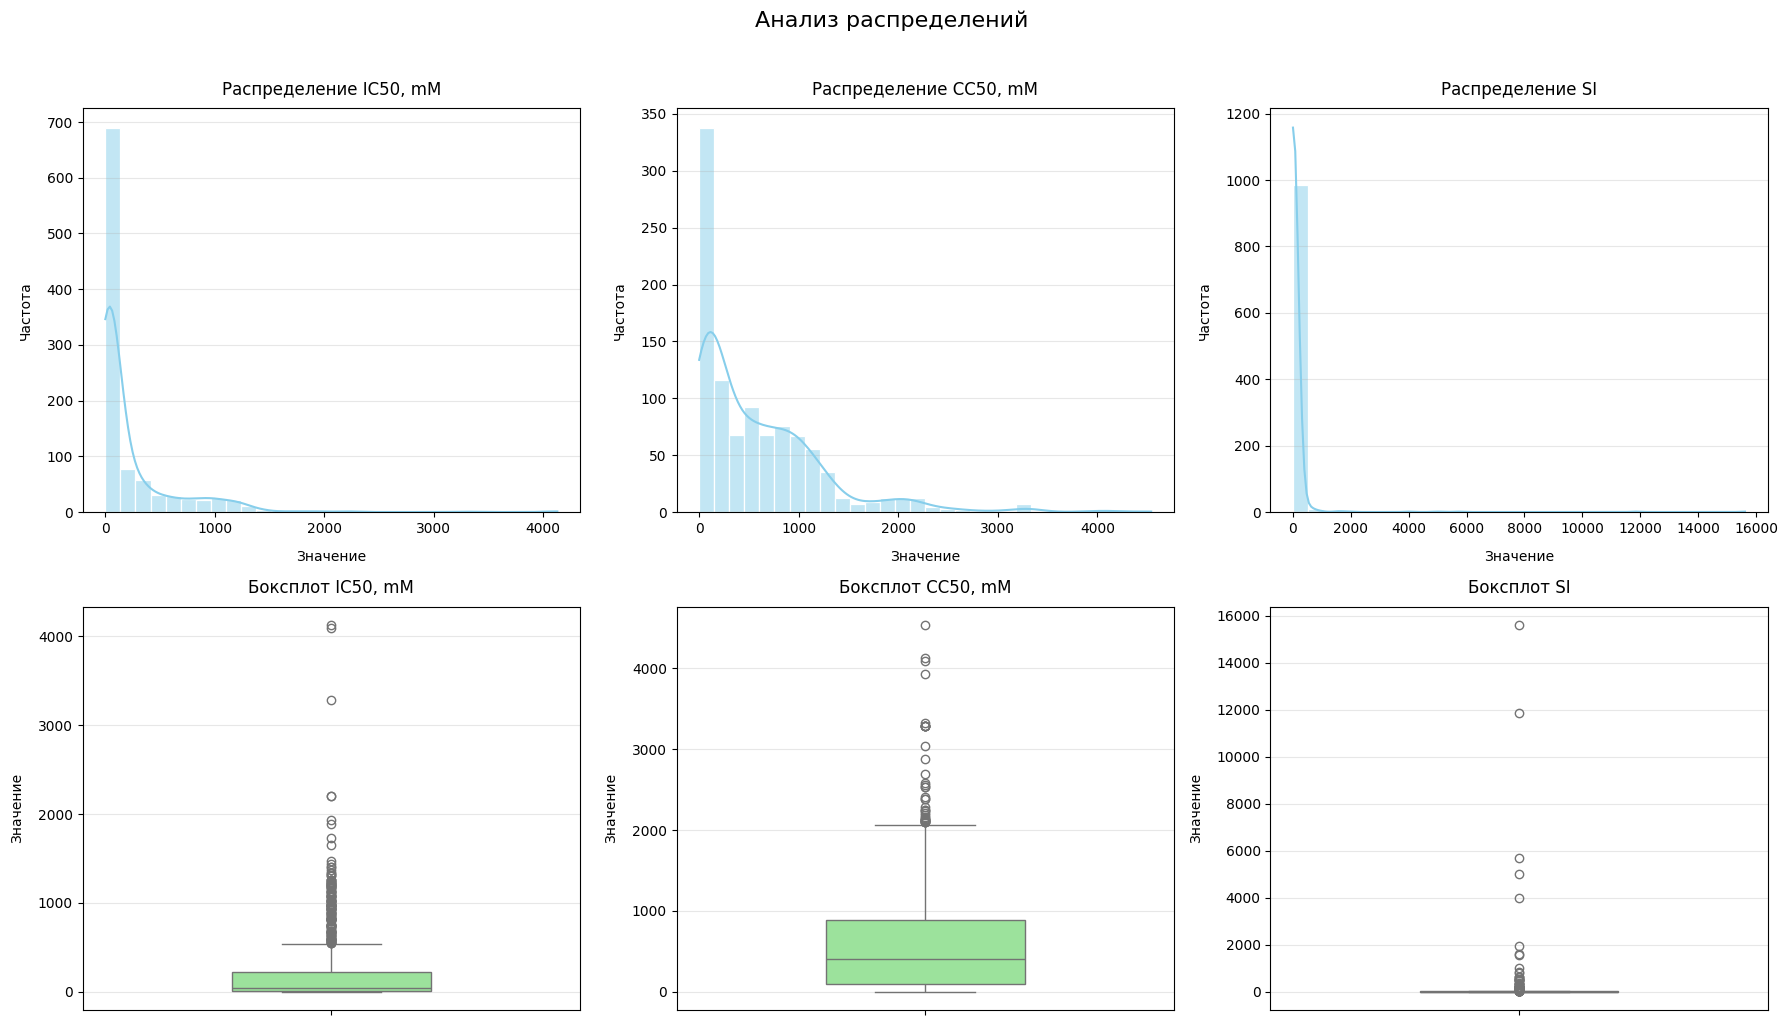


Описательная статистика:


count        mean         std       min        25%         50%  \
IC50, mM  1001.0  222.805156  402.169734  0.003517  12.515396   46.585183   
CC50, mM  1001.0  589.110728  642.867508  0.700808  99.999036  411.039342   
SI        1001.0   72.508823  684.482739  0.011489   1.433333    3.846154   

                 75%           max  
IC50, mM  224.975928   4128.529377  
CC50, mM  894.089177   4538.976189  
SI         16.566667  15620.600000


Количество выбросов :


Показатель  Выбросы (до)
0   IC50, mM           147
1   CC50, mM            39
2         SI           125

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

# Выделим целевые переменные
bio_vars = ['IC50, mM', 'CC50, mM', 'SI']

# Функция для подсчета выбросов
def count(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Преобразуем данные (замена запятых и приведение к числовому типу)
for col in bio_vars:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Создаем фигуру для исходных данных
plt.figure(figsize=(18, 10))
plt.suptitle('Анализ распределений ', y=1.02, fontsize=16)

# Гистограммы и боксплоты исходных данных
for i, var in enumerate(bio_vars, 1):
    # Гистограммы
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, color='skyblue', bins=30, edgecolor='white')
    plt.title(f'Распределение {var}', pad=10)
    plt.xlabel('Значение', labelpad=10)
    plt.ylabel('Частота', labelpad=10)
    plt.grid(axis='y', alpha=0.3)

    # Боксплоты
    plt.subplot(2, 3, i+3)
    sns.boxplot(y=df[var], color='lightgreen', width=0.4)
    plt.title(f'Боксплот {var}', pad=10)
    plt.ylabel('Значение', labelpad=10)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Описательная статистика
print("\nОписательная статистика:")
display(df[bio_vars].describe().T)

# Подсчет выбросов
outliers = pd.DataFrame({
    'Показатель': bio_vars,
    'Выбросы (до)': [count(df[col]) for col in bio_vars]
})
print("\nКоличество выбросов :")
display(outliers)

### Дескрипторы

--- Категория: Электронные ---

Статистика дескрипторов:
                       Среднее    Медиана  Стандартное отклонение   Минимум  \
MaxAbsEStateIndex    10.831637  12.179236                3.307505  2.321942   
MaxEStateIndex       10.831637  12.179236                3.307505  2.321942   
MinAbsEStateIndex     0.180681   0.124606                0.168710  0.000039   
MinEStateIndex       -0.967237  -0.419485                1.588036 -6.992796   
MaxPartialCharge      0.235749   0.250661                0.129429 -0.016706   
MinPartialCharge     -0.407436  -0.393567                0.075974 -0.744036   
MaxAbsPartialCharge   0.415741   0.426056                0.071951  0.085007   
MinAbsPartialCharge   0.227534   0.250661                0.119641  0.002020   

                      Максимум  Количество пропущенных значений  \
MaxAbsEStateIndex    15.933463                                0   
MaxEStateIndex       15.933463                                0   
MinAbsEStateIndex     1.374614

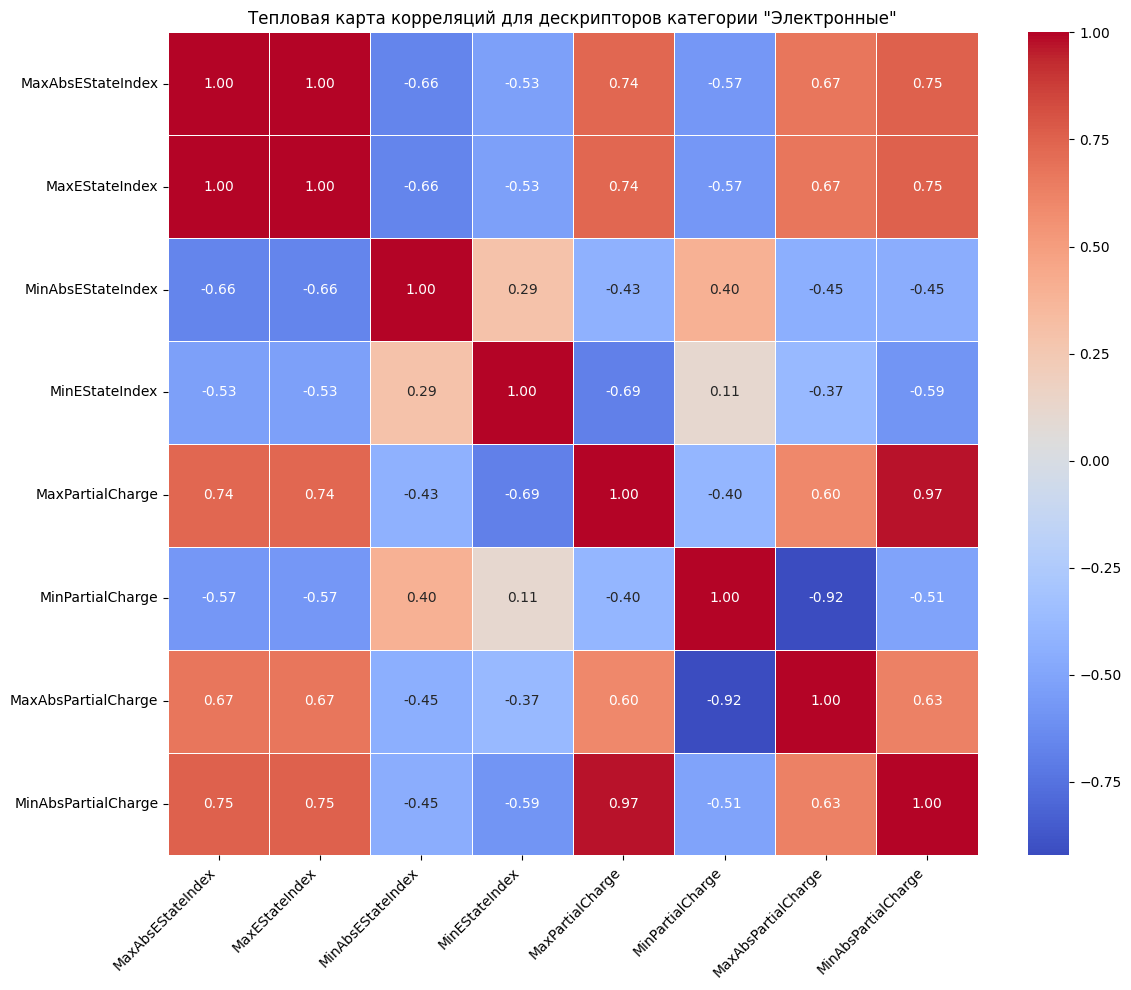



--- Категория: Отпечатки_BCUT ---

Статистика дескрипторов:
                    Среднее    Медиана  Стандартное отклонение    Минимум  \
FpDensityMorgan1   1.143163   1.153846                0.241080   0.222222   
FpDensityMorgan2   1.824615   1.880000                0.320613   0.377778   
FpDensityMorgan3   2.418738   2.500000                0.396290   0.577778   
BCUT2D_MWHI       23.196621  16.564091               14.529014  14.513946   
BCUT2D_MWLOW       9.792567   9.715411                0.461284   0.931261   
BCUT2D_MRHI        6.295386   5.938573                1.090991   4.652069   
BCUT2D_MRLOW      -0.069485  -0.113820                0.249599  -1.080944   
BCUT2D_CHGHI       2.472204   2.505815                0.162113   1.834460   
BCUT2D_CHGLO      -2.347064  -2.358527                0.168873  -2.721859   
BCUT2D_LOGPHI      2.473116   2.485135                0.157111   1.932099   
BCUT2D_LOGPLOW    -2.403494  -2.396486                0.177036  -2.785712   

             

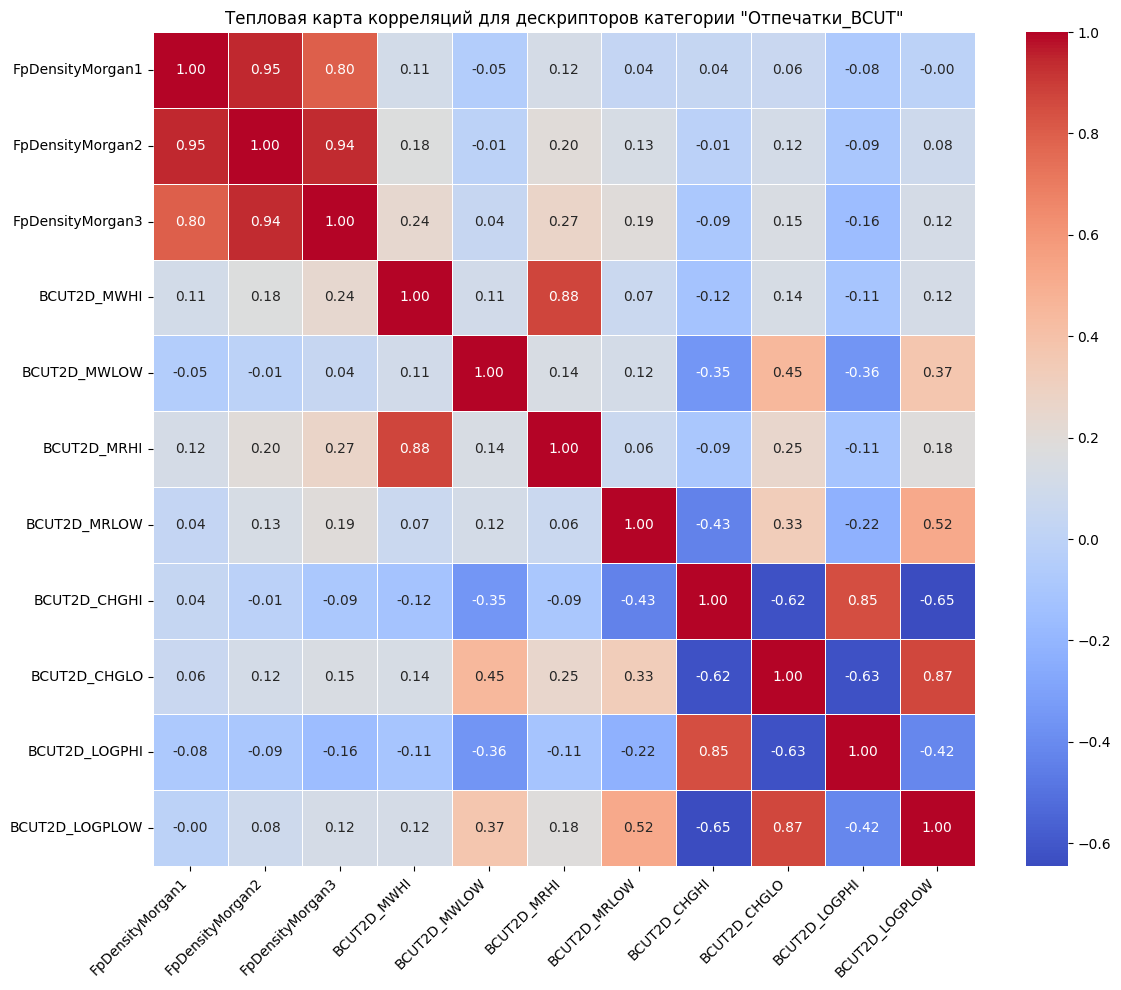



--- Категория: Топологические ---

Статистика дескрипторов:
                    Среднее        Медиана  Стандартное отклонение  \
AvgIpc         2.816498e+00       2.803972            4.322846e-01   
BalabanJ       1.853512e+00       1.843942            4.547033e-01   
BertzCT        7.539898e+02     660.913747            4.359106e+02   
Chi0           1.766739e+01      16.070703            6.309870e+00   
Chi0n          1.452423e+01      13.296285            5.179048e+00   
Chi0v          1.485495e+01      13.632721            5.268821e+00   
Chi1           1.172925e+01      10.432489            4.432143e+00   
Chi1n          8.639561e+00       7.921764            3.136190e+00   
Chi1v          8.937560e+00       8.084748            3.229219e+00   
Chi2n          7.316551e+00       6.744335            2.744515e+00   
Chi2v          7.657106e+00       7.252306            2.836887e+00   
Chi3n          5.621344e+00       5.131109            2.464375e+00   
Chi3v          5.907535e+00 

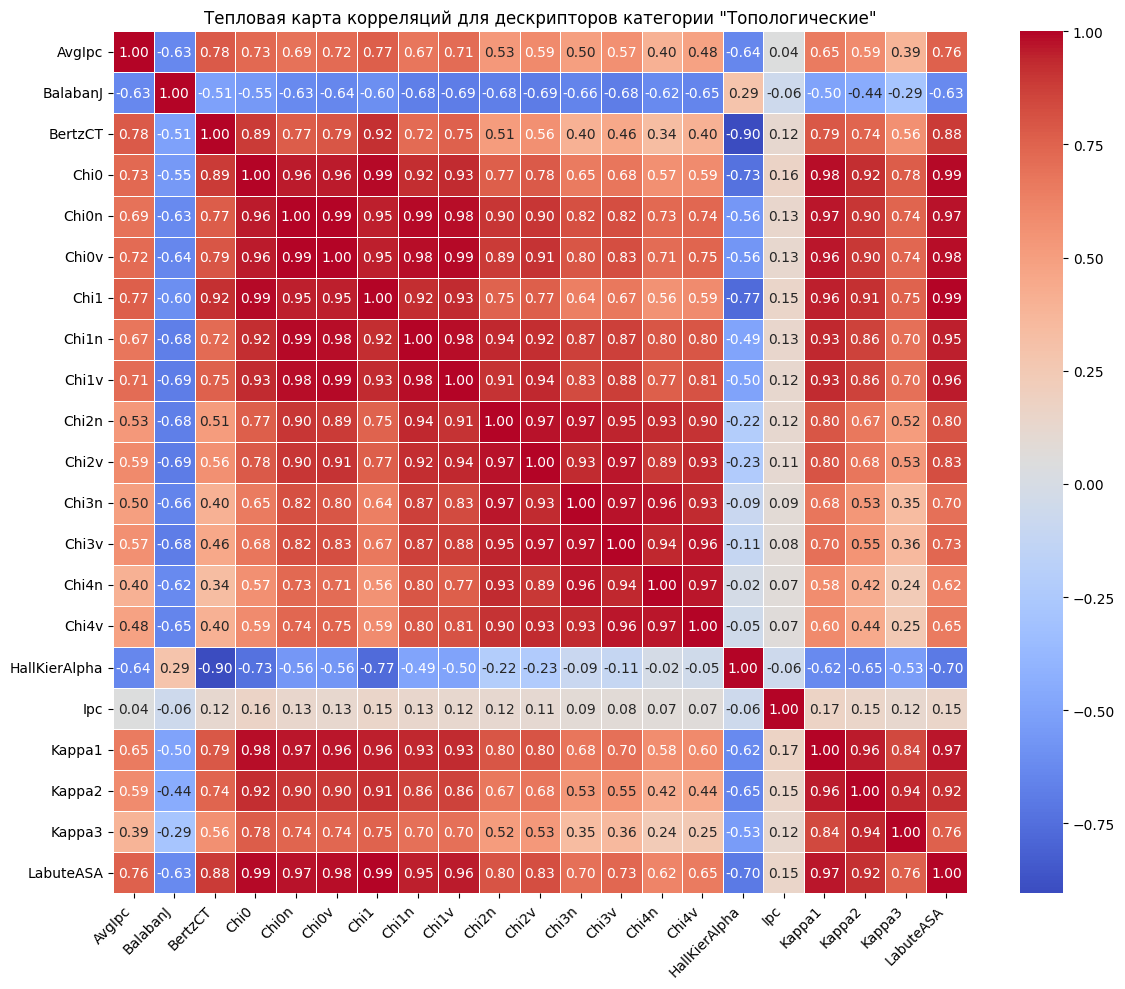



--- Категория: VSA ---

Статистика дескрипторов:
                Среднее    Медиана  Стандартное отклонение    Минимум  \
PEOE_VSA1     12.629592   9.843390               11.593324   0.000000   
PEOE_VSA2      5.973663   4.794537                5.865969   0.000000   
PEOE_VSA3      2.982899   0.000000                4.960532   0.000000   
PEOE_VSA4      2.947225   0.000000                6.723448   0.000000   
PEOE_VSA5      1.760798   0.000000                4.393851   0.000000   
PEOE_VSA6     26.411112  22.673572               20.628518   0.000000   
PEOE_VSA7     41.519234  38.063890               21.817573   0.000000   
PEOE_VSA8     16.487636  17.016043               10.803305   0.000000   
PEOE_VSA9     14.762791  12.294268               12.528710   0.000000   
PEOE_VSA10     8.063287   5.687386               12.609104   0.000000   
PEOE_VSA11     4.993287   0.000000                8.940833   0.000000   
PEOE_VSA12     3.410458   0.000000                5.462960   0.000000   


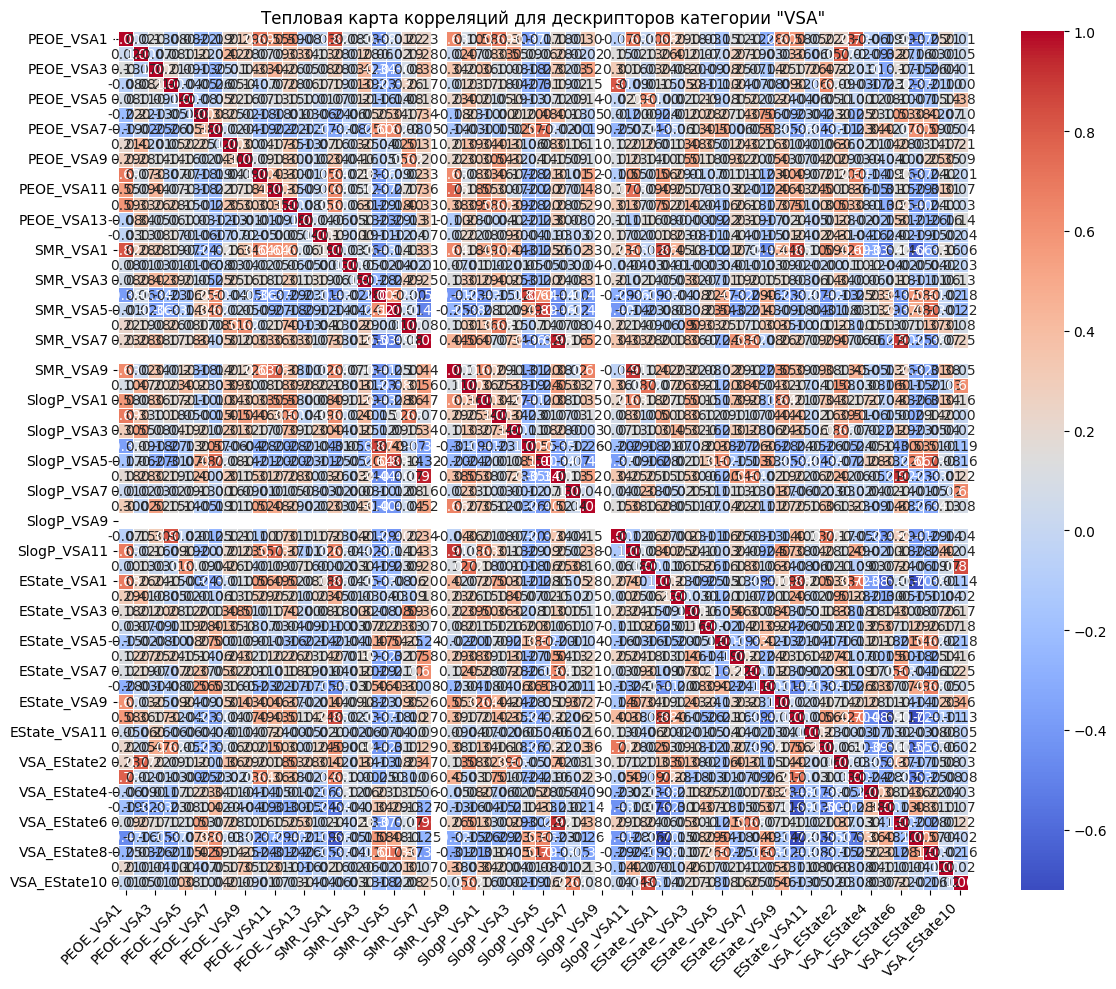



--- Категория: Молекулярные_свойства ---

Статистика дескрипторов:
                   Среднее     Медиана  Стандартное отклонение     Минимум  \
qed               0.580412    0.634981                0.212230    0.059567   
SPS              29.487989   29.290323               12.742749    9.416667   
MolWt           348.262234  315.457000              126.946370  110.156000   
HeavyAtomMolWt  324.469003  293.183000              121.694134  100.076000   
ExactMolWt      347.940606  315.219829              126.807891  110.073165   
FractionCSP3      0.542519    0.555556                0.310584    0.000000   
MolLogP           3.437327    3.423600                2.142706   -5.750700   
MolMR            94.189041   85.643500               34.432818   28.088500   
TPSA             61.400769   49.740000               45.743831    0.000000   

                  Максимум  Количество пропущенных значений  \
qed               0.947265                                0   
SPS              60.2727

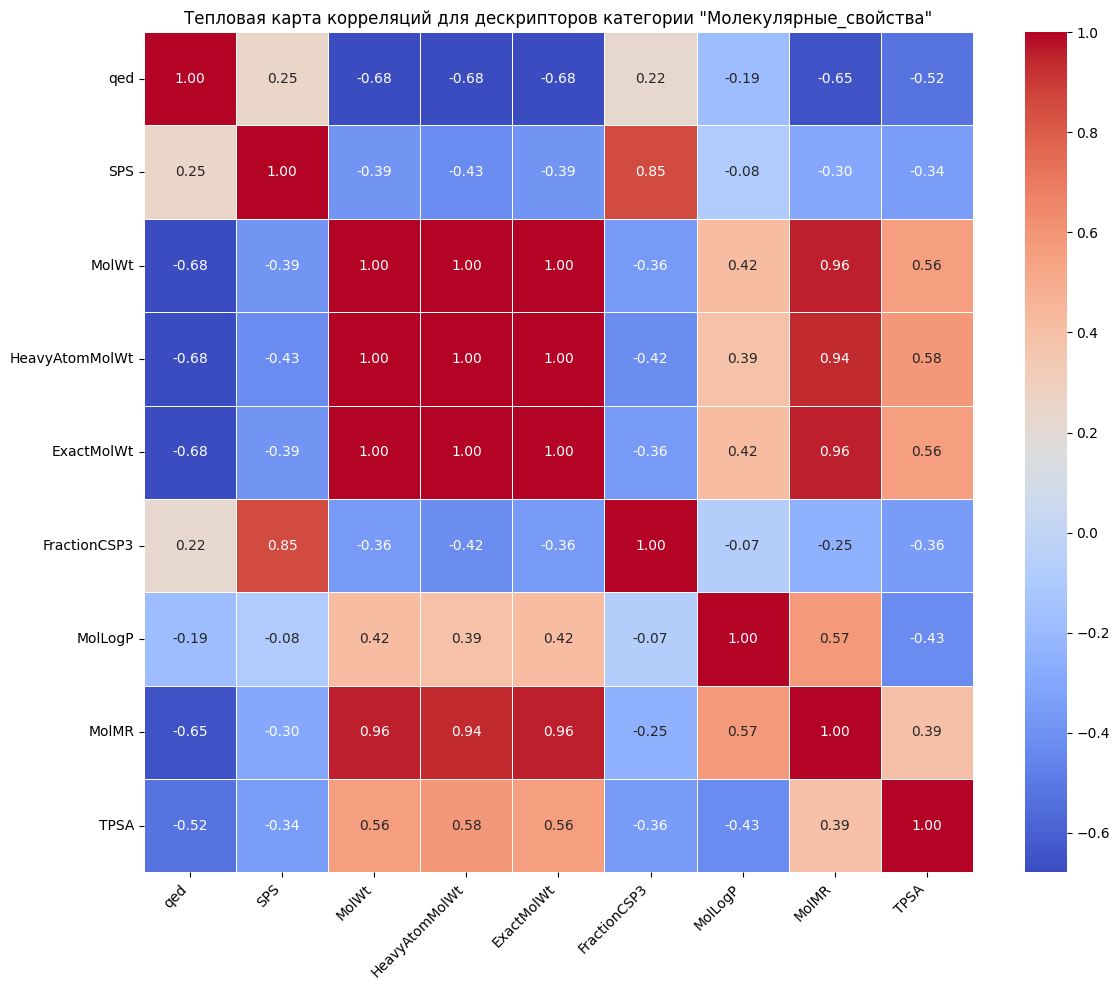



--- Категория: Структурные_счетчики ---

Статистика дескрипторов:
                             Среднее  Медиана  Стандартное отклонение  \
HeavyAtomCount             24.652348     22.0                9.069124   
NHOHCount                   1.317682      1.0                1.704399   
NOCount                     4.687313      4.0                3.203300   
NumAliphaticCarbocycles     1.226773      1.0                1.455171   
NumAliphaticHeterocycles    0.862138      1.0                1.039699   
NumAliphaticRings           2.088911      2.0                1.360547   
NumAromaticCarbocycles      0.961039      1.0                0.996735   
NumAromaticHeterocycles     0.512488      0.0                0.725323   
NumAromaticRings            1.473526      1.0                1.393395   
NumHAcceptors               4.338661      4.0                3.206274   
NumHDonors                  1.181818      1.0                1.588996   
NumHeteroatoms              5.588412      5.0           

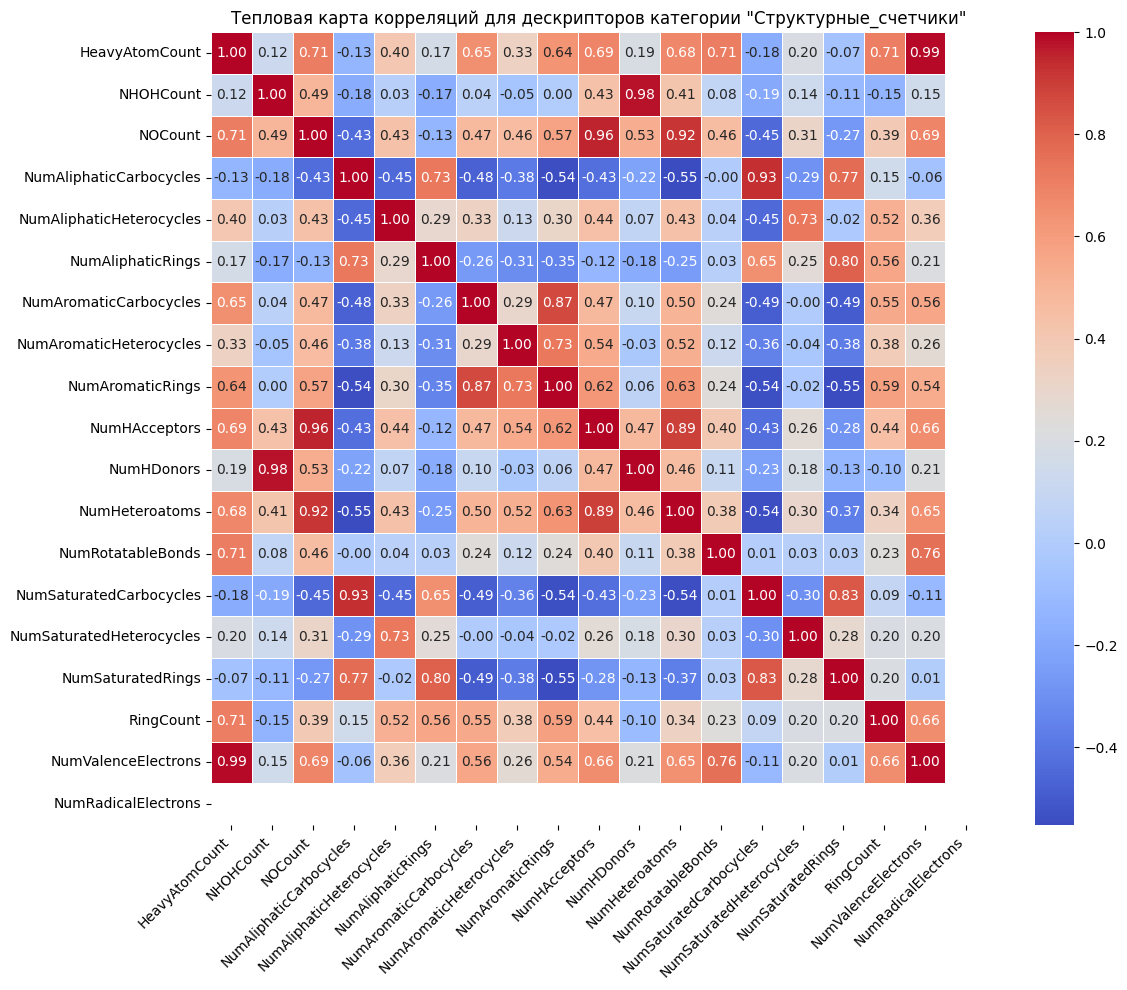



--- Категория: Функциональные_группы ---

Статистика дескрипторов:
                   Среднее  Медиана  Стандартное отклонение  Минимум  \
fr_Al_COO         0.055944      0.0                0.229929        0   
fr_Al_OH          0.403596      0.0                1.040647        0   
fr_Al_OH_noTert   0.310689      0.0                0.996181        0   
fr_ArN            0.014985      0.0                0.129519        0   
fr_Ar_COO         0.000999      0.0                0.031607        0   
...                    ...      ...                     ...      ...   
fr_thiazole       0.051948      0.0                0.222033        0   
fr_thiocyan       0.000000      0.0                0.000000        0   
fr_thiophene      0.069930      0.0                0.255157        0   
fr_unbrch_alkane  0.204795      0.0                1.215326        0   
fr_urea           0.006993      0.0                0.083373        0   

                  Максимум  Количество пропущенных значений  \
fr_

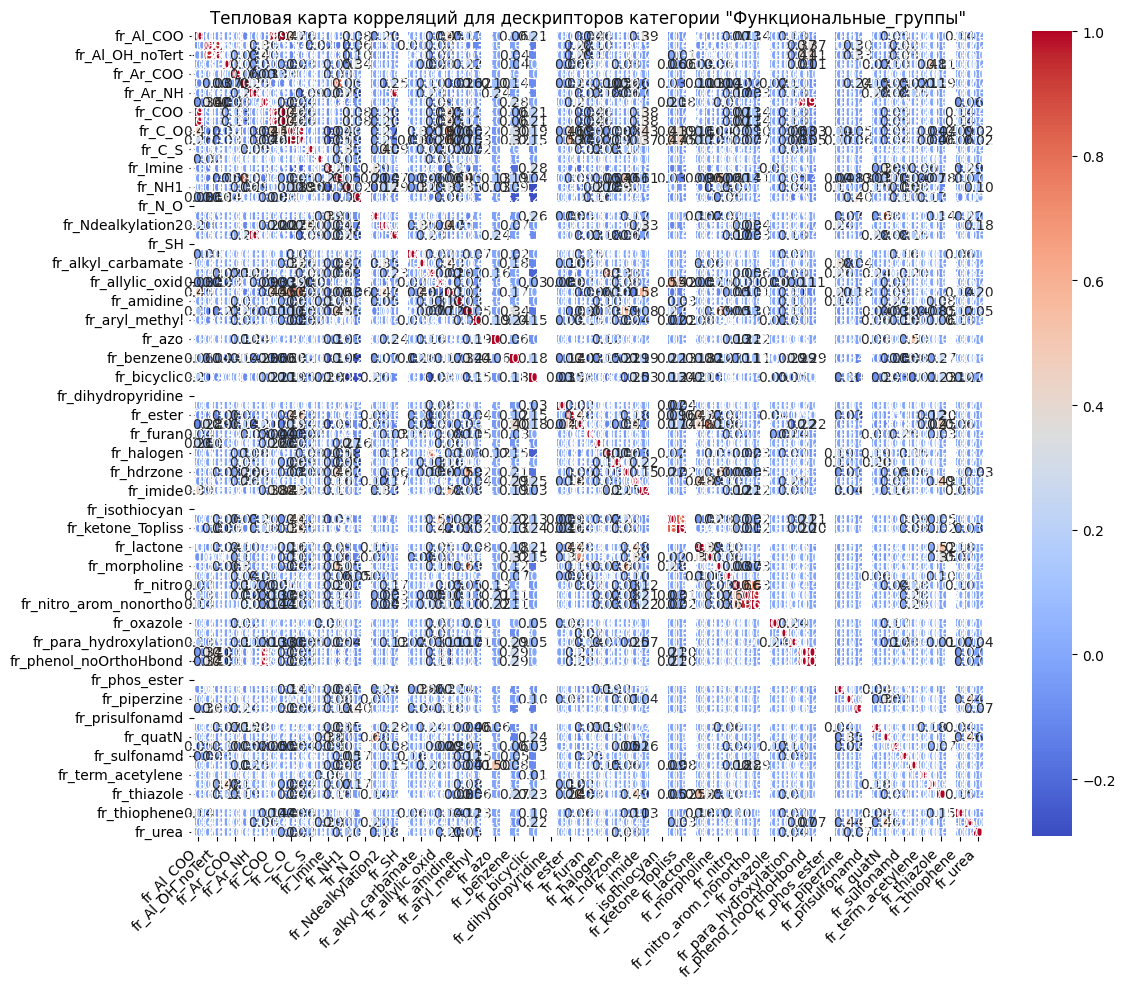

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate(df):
    stats_df = pd.DataFrame(index=df.columns)

    # Базовые статистики
    stats_df['Среднее'] = df.mean()
    stats_df['Медиана'] = df.median()
    stats_df['Стандартное отклонение'] = df.std()
    stats_df['Минимум'] = df.min()
    stats_df['Максимум'] = df.max()

    # Пропущенные значения
    stats_df['Количество пропущенных значений'] = df.isnull().sum()
    stats_df['% пропущенных значений'] = (df.isnull().sum() / len(df)) * 100

    # Выбросы (правило 1.5*IQR)
    def count_outliers(series):
        if pd.api.types.is_numeric_dtype(series):
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            return series[(series < lower_bound) | (series > upper_bound)].count()
        return np.nan # Возвращаем NaN для нечисловых рядов

    stats_df['Выбросы'] = df.apply(count_outliers)

    # Коэффициент вариации
    stats_df['CV%'] = (df.std() / df.mean().replace(0, np.nan)) * 100

    return stats_df

def display_heatmap(df, category_name):
    if df.empty:
        print(f"\nПропускаем тепловую карту для пустой категории: {category_name}")
        return

    # Выбираем только числовые столбцы для корреляции
    numeric_df = df.select_dtypes(include=np.number)
    if numeric_df.empty:
        print(f"\nНет числовых столбцов для построения графика в категории: {category_name}")
        return
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Тепловая карта корреляций для дескрипторов категории "{category_name}"')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show() # Отображаем график
    plt.close() # Закрываем график, чтобы он не накладывался на следующий


# Группировка дескрипторов по категориям
descriptor_categories = {
    'Электронные': [
        'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex',
        'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge'
    ],
    'Отпечатки_BCUT': [
        'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
        'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW',
        'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW'
    ],
    'Топологические': [
        'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v',
        'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc',
        'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA'
    ],
    'VSA': [
        'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
        'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
        'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4',
        'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10',
        'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5',
        'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10',
        'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3',
        'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
        'EState_VSA9', 'EState_VSA10', 'EState_VSA11', 'VSA_EState1', 'VSA_EState2',
        'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7',
        'VSA_EState8', 'VSA_EState9', 'VSA_EState10'
    ],
    'Молекулярные_свойства': [
        'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'FractionCSP3',
        'MolLogP', 'MolMR', 'TPSA'
    ],
    'Структурные_счетчики': [
        'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
        'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles',
        'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
        'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
        'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
        'NumSaturatedRings', 'RingCount', 'NumValenceElectrons',
        'NumRadicalElectrons'
    ],
    'Функциональные_группы': [
        col for col in df.columns if col.startswith('fr_')
    ]
}

# Преобразуем все соответствующие столбцы дескрипторов в числовой формат
all_descriptor_cols = [col for sublist in descriptor_categories.values() for col in sublist if col in df.columns]
for col in all_descriptor_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Обработка и вывод ---
results = {}
for category, descriptors in descriptor_categories.items():
    valid_descriptors = [d for d in descriptors if d in df.columns]

    print(f"--- Категория: {category} ---")
    if valid_descriptors:
        # Расчет статистики для числовых дескрипторов в категории
        numeric_valid_descriptors = df[valid_descriptors].select_dtypes(include=np.number).columns.tolist()
        if numeric_valid_descriptors:
            category_stats = calculate(df[numeric_valid_descriptors])
            print("\nСтатистика дескрипторов:")
            print(category_stats)
            display_heatmap(df[numeric_valid_descriptors], category)
        else:
            print("Нет числовых дескрипторов для расчета статистики и построения тепловой карты в этой категории.")
            # Все еще показываем статистику пропущенных значений, если есть хоть какие-то дескрипторы
            temp_df = df[valid_descriptors]
            if not temp_df.empty:
                stats_df = pd.DataFrame(index=temp_df.columns)
                stats_df['Количество пропущенных значений'] = temp_df.isnull().sum()
                stats_df['% пропущенных значений'] = (temp_df.isnull().sum() / len(temp_df)) * 100
                print("\nСтатистика пропущенных значений:")
                print(stats_df)
    else:
        print("Для этой категории не найдено дескрипторов в DataFrame.")
    print("\n" + "="*50 + "\n") # Разделитель для лучшей читаемости


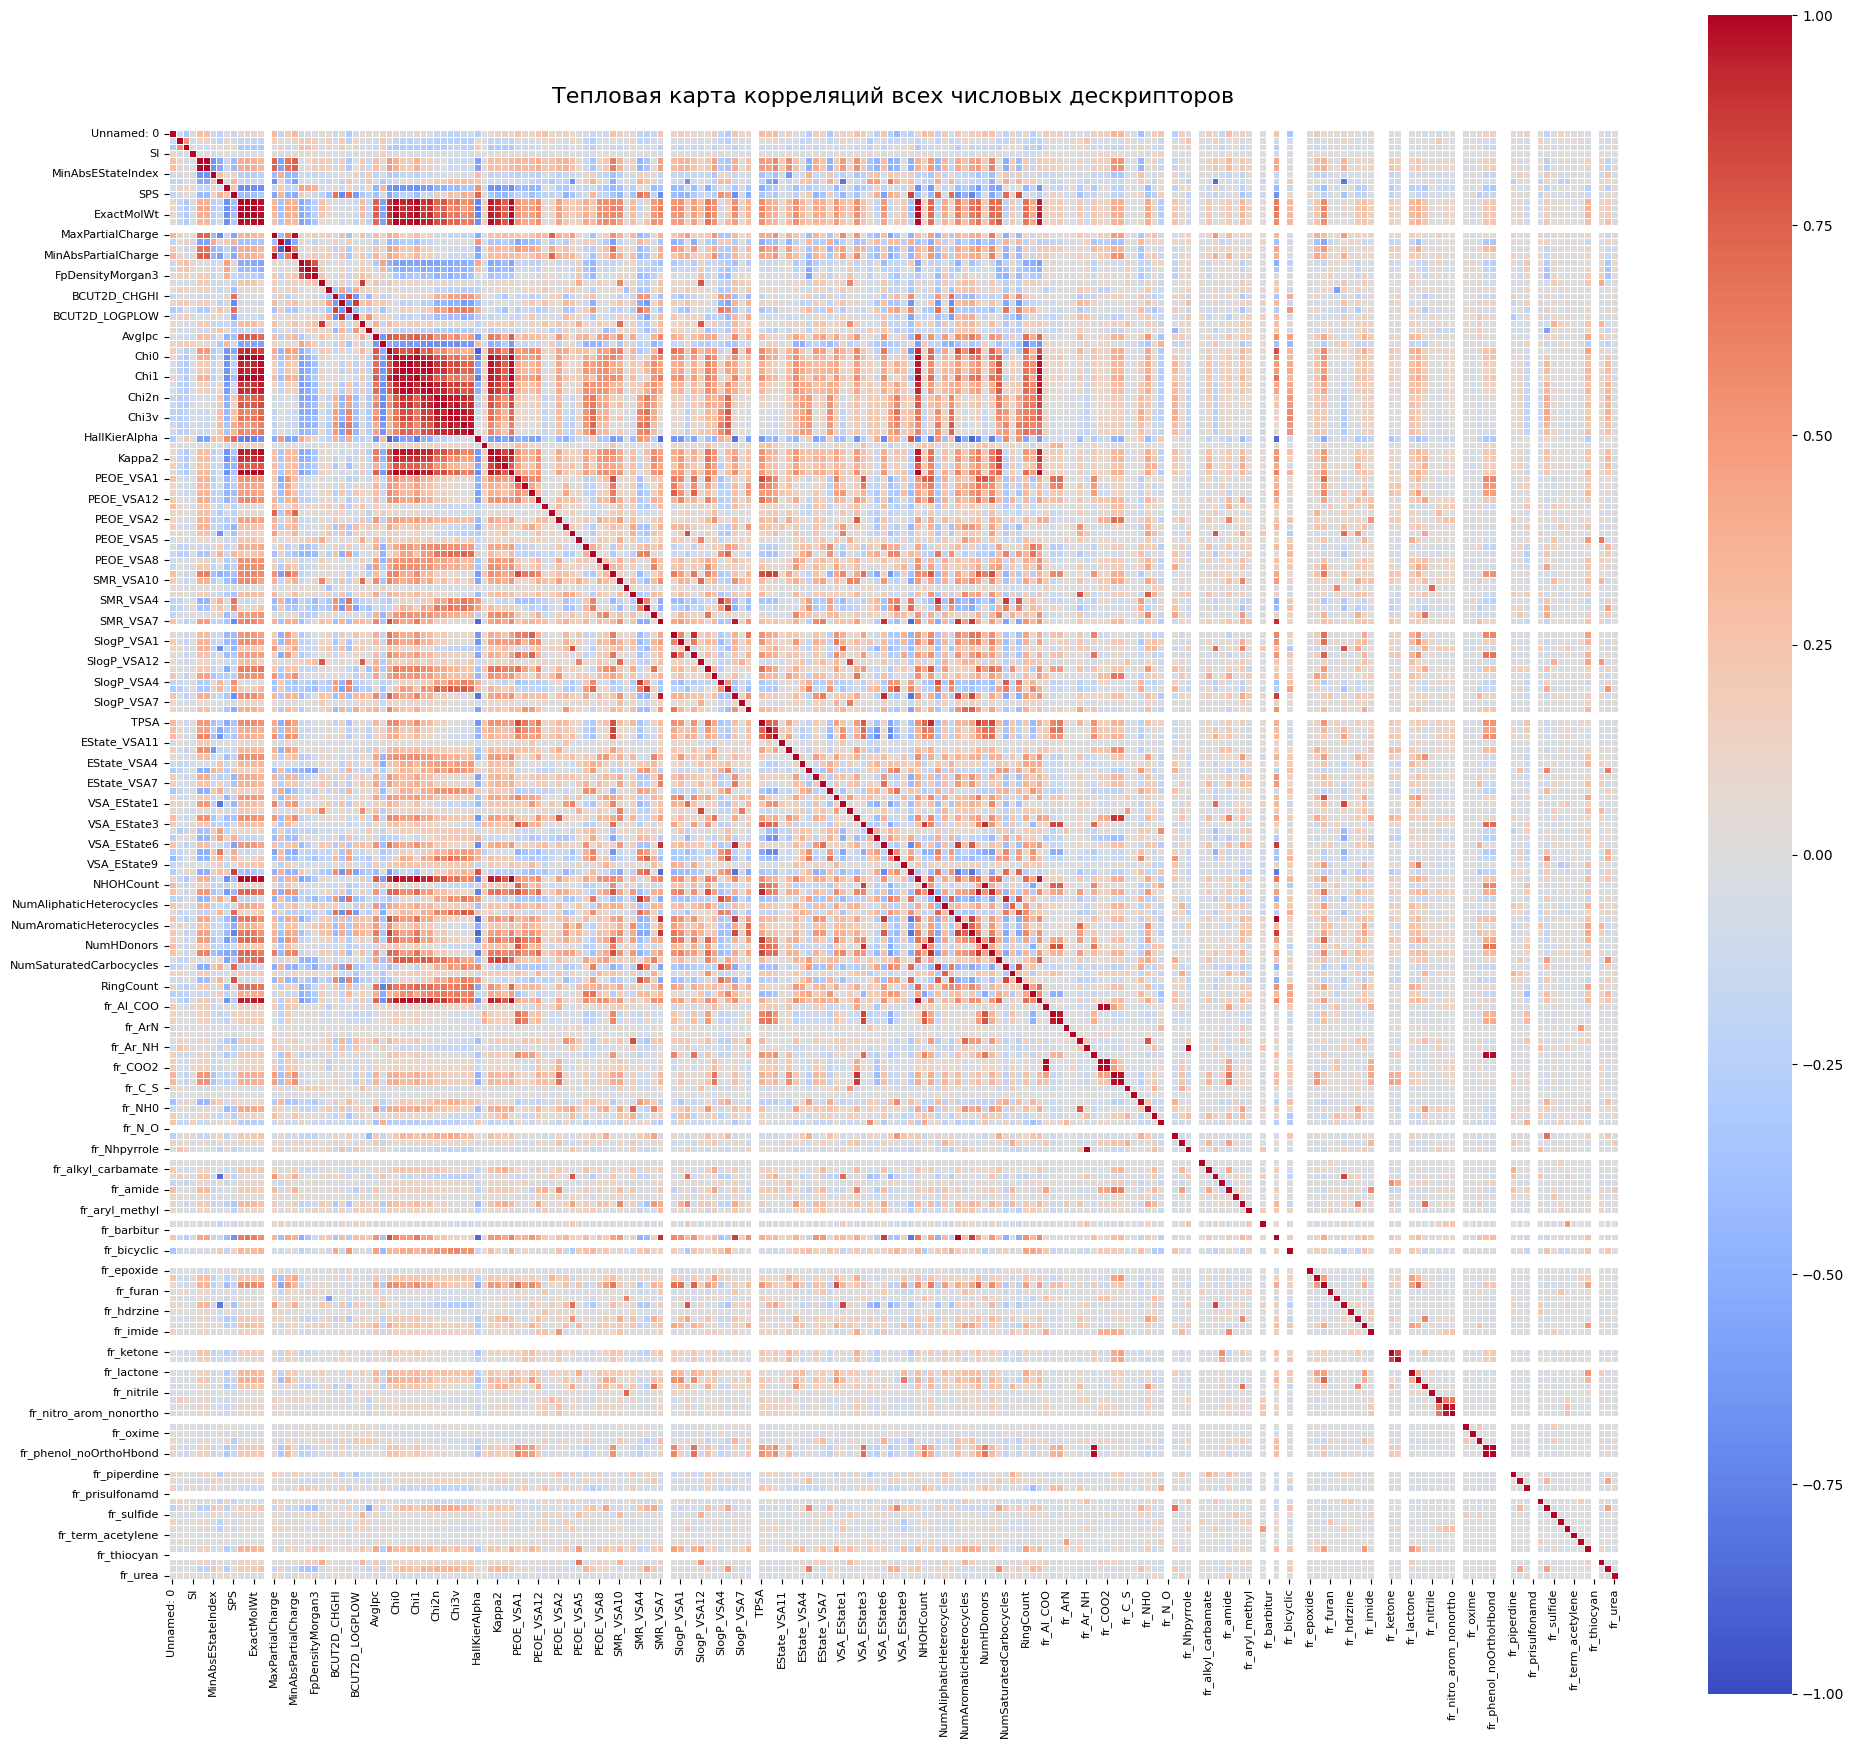


Таблица корреляций (первые 40 строк):


In [ ]:
def heatmap(df):
    # Выбираем все числовые столбцы
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("Нет числовых столбцов для построения тепловой карты")
        return

    # Создаем корреляционную матрицу
    corr_matrix = df[numeric_cols].corr()

    # 1. Выводим тепловую карту
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix,
                annot=False,
                cmap='coolwarm',
                vmin=-1, vmax=1,
                linewidths=0.5,
                square=True)
    plt.title('Тепловая карта корреляций всех числовых дескрипторов', pad=20, fontsize=16)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()
    plt.close()

    # 2. Выводим таблицу с корреляциями
    print("\nТаблица корреляций (первые 40 строк):")
    # Преобразуем матрицу в длинный формат для удобства чтения
    corr_table = corr_matrix.stack().reset_index()
    corr_table.columns = ['Дескриптор 1', 'Дескриптор 2', 'Корреляция']

    # Убираем дубликаты (A-B и B-A) и корреляцию дескриптора с самим собой
    corr_table = corr_table[corr_table['Дескриптор 1'] < corr_table['Дескриптор 2']]

    # Сортируем по абсолютному значению корреляции
    corr_table['Абс. корреляция'] = corr_table['Корреляция'].abs()
    corr_table = corr_table.sort_values('Абс. корреляция', ascending=False)

    # Выводим первые 40 самых сильных корреляций
    display(corr_table.head(40).style.format({'Корреляция': '{:.3f}', 'Абс. корреляция': '{:.3f}'}))

# Вызов функции
heatmap(df)

### Корреляция между дескрипторами и биологической активности


Топ-20 дескрипторов для IC50, mM:


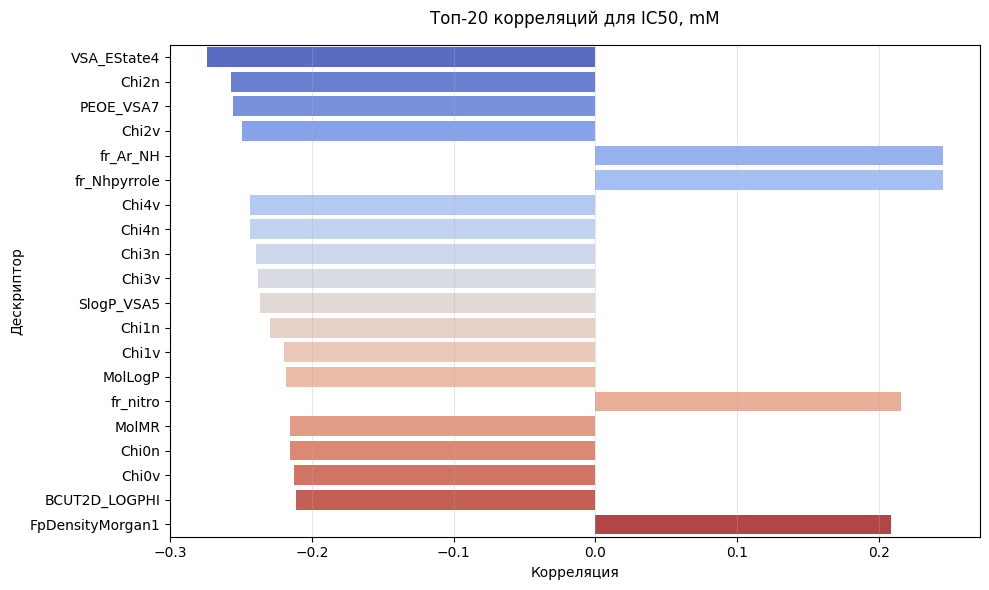


Топ-20 дескрипторов для CC50, mM:


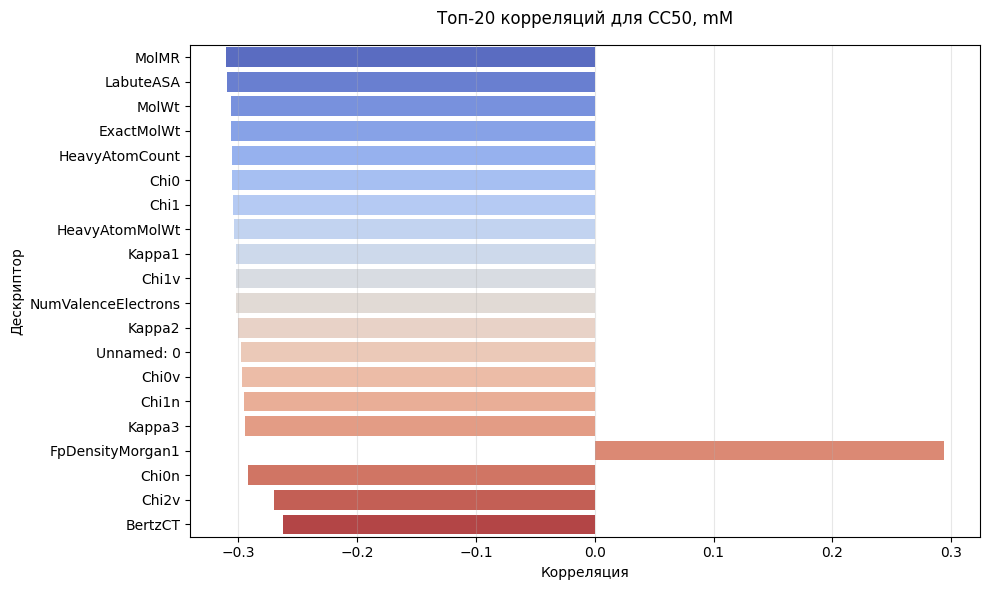


Топ-20 дескрипторов для SI:


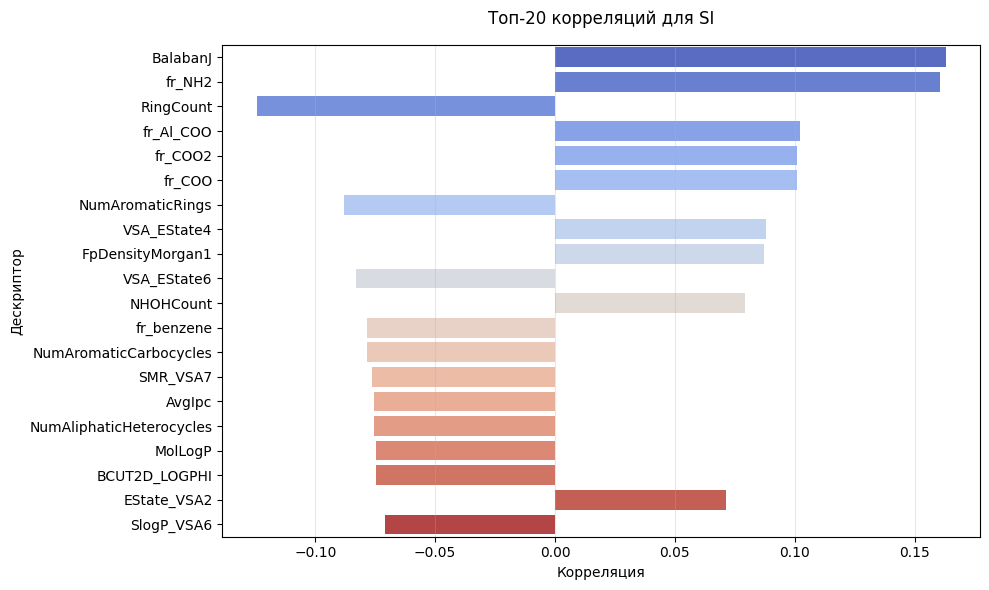

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze(df, bio_vars=['IC50, mM', 'CC50, mM', 'SI'], top_n=20):
    # Копируем и чистим данные
    df_clean = df.copy()
    df_clean = df_clean.dropna(subset=bio_vars)

    # Выбираем числовые дескрипторы (исключая биологические переменные)
    numeric_cols = [col for col in df_clean.select_dtypes(include=np.number).columns
                   if col not in bio_vars]

    # 2. Топ-коррелирующие дескрипторы для каждого биопоказателя
    for bio_var in bio_vars:
        print(f"\nТоп-{top_n} дескрипторов для {bio_var}:")
        corrs = df_clean[numeric_cols].corrwith(df_clean[bio_var])
        corr_df = pd.DataFrame({
            'Дескриптор': corrs.index,
            'Корреляция': corrs.values,
            'Абс. корреляция': abs(corrs.values)
        }).dropna().sort_values('Абс. корреляция', ascending=False).head(top_n)

        # Визуализация
        plt.figure(figsize=(10, 6))
        sns.barplot(data=corr_df, x='Корреляция', y='Дескриптор', palette='coolwarm')
        plt.title(f'Топ-{top_n} корреляций для {bio_var}', pad=15)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Таблица
        display(corr_df.style.format({'Корреляция': '{:.3f}', 'Абс. корреляция': '{:.3f}'})
                  .background_gradient(cmap='coolwarm', subset=['Корреляция']))

analyze(df)

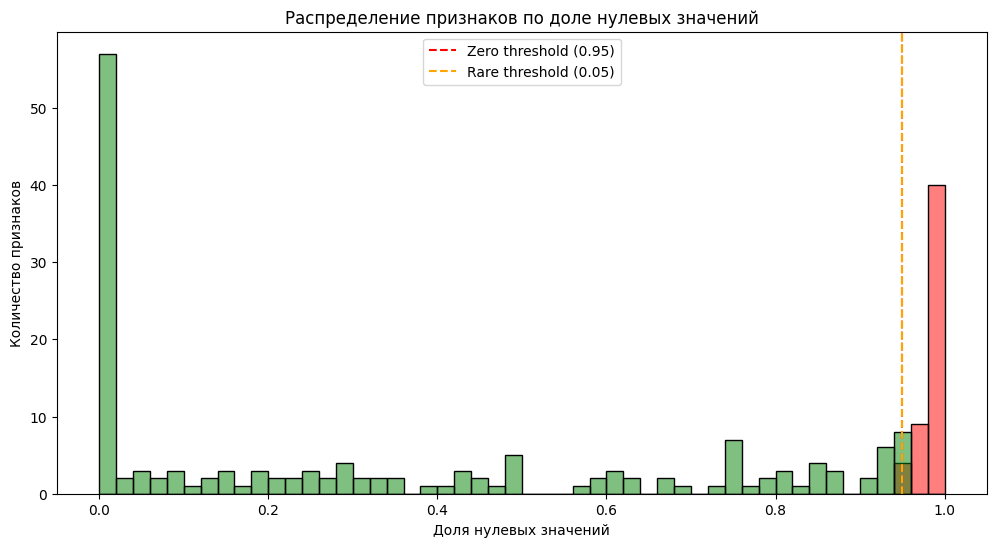

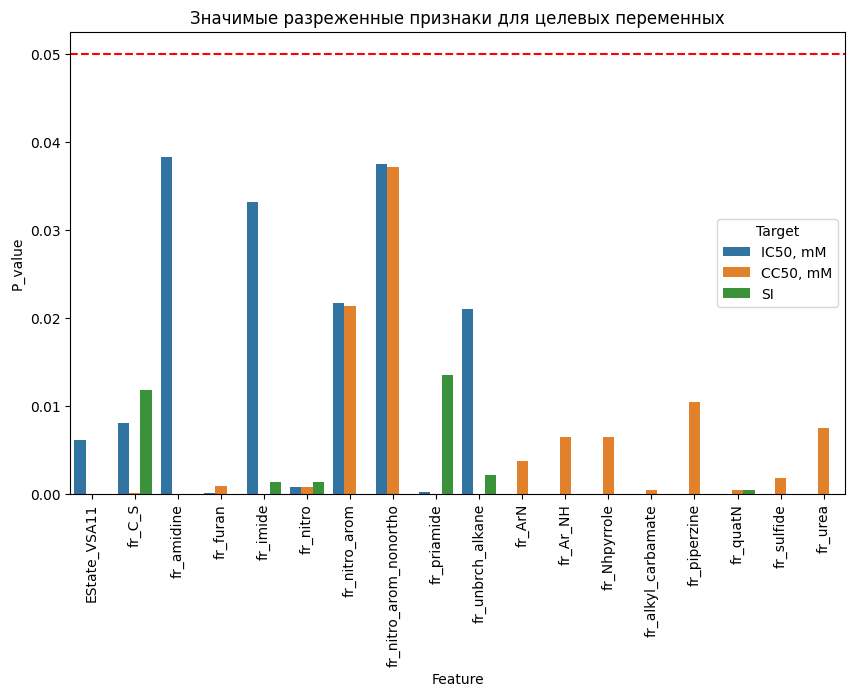

In [ ]:
def analyze_sparse_features(df, target_cols=None, zero_threshold=0.95, rare_threshold=0.05):
    # 1. Инициализация
    sparse_results = []

    # 2. Расчет статистик по каждому признаку
    for col in df.columns:
        # Пропускаем целевые переменные
        if target_cols and col in target_cols:
            continue

        # Расчет основных статистик
        n_zeros = (df[col] == 0).sum()
        pct_zeros = n_zeros / len(df)
        n_unique = df[col].nunique()

        # Определение типа признака
        if pct_zeros >= zero_threshold:
            sparse_type = "Zero-dominated"
        elif (1 - pct_zeros) < rare_threshold:
            sparse_type = "Rare-values"
        else:
            sparse_type = "Normal"

        sparse_results.append({
            'Feature': col,
            'Zero_Count': n_zeros,
            'Zero_Pct': round(pct_zeros, 4),
            'Unique_Values': n_unique,
            'Sparse_Type': sparse_type,
            'Mean': df[col].mean(),
            'Std': df[col].std()
        })

    # Создаем DataFrame с результатами
    sparse_df = pd.DataFrame(sparse_results)

    # 3. Визуализация
    plt.figure(figsize=(12, 6))
    sns.histplot(data=sparse_df, x='Zero_Pct', bins=50, hue='Sparse_Type',
                 palette={'Zero-dominated': 'red', 'Rare-values': 'orange', 'Normal': 'green'})
    plt.axvline(x=zero_threshold, color='r', linestyle='--', label=f'Zero threshold ({zero_threshold})')
    plt.axvline(x=1-rare_threshold, color='orange', linestyle='--', label=f'Rare threshold ({rare_threshold})')
    plt.title('Распределение признаков по доле нулевых значений')
    plt.xlabel('Доля нулевых значений')
    plt.ylabel('Количество признаков')
    plt.legend()
    plt.show()

    # 4. Анализ информативности для целевых переменных (если указаны)
    if target_cols:
        informative_sparse = []
        for target in target_cols:
            # Берем только разреженные признаки
            sparse_features = sparse_df[sparse_df['Sparse_Type'] != 'Normal']['Feature'].values

            for feature in sparse_features:
                # Для бинарных признаков - точный тест Фишера
                if sparse_df.loc[sparse_df['Feature'] == feature, 'Unique_Values'].values[0] == 2:
                    from scipy.stats import fisher_exact
                    contingency = pd.crosstab(df[feature], df[target] > df[target].median())
                    try:
                        _, p_value = fisher_exact(contingency)
                    except:
                        p_value = np.nan
                else:
                    # Для непрерывных - тест Манна-Уитни с проверкой размера выборки
                    nonzero_group = df[df[feature] != 0][target]
                    zero_group = df[df[feature] == 0][target]

                    if len(nonzero_group) >= 4 and len(zero_group) >= 4:
                        from scipy.stats import mannwhitneyu
                        try:
                            _, p_value = mannwhitneyu(nonzero_group, zero_group, alternative='two-sided')
                        except:
                            p_value = np.nan
                    else:
                        p_value = np.nan

                informative_sparse.append({
                    'Target': target,
                    'Feature': feature,
                    'P_value': p_value,
                    'Mean_Target_NonZero': df[df[feature] != 0][target].mean() if len(df[df[feature] != 0]) > 0 else np.nan,
                    'Mean_Target_Zero': df[df[feature] == 0][target].mean() if len(df[df[feature] == 0]) > 0 else np.nan,
                    'NonZero_Count': len(df[df[feature] != 0]),
                    'Zero_Count': len(df[df[feature] == 0])
                })

        informative_df = pd.DataFrame(informative_sparse)
        informative_df['Significant'] = informative_df['P_value'] < 0.05

        # Визуализация значимых разреженных признаков
        plt.figure(figsize=(10, 6))
        significant_features = informative_df[informative_df['Significant']]
        if not significant_features.empty:
            sns.barplot(data=significant_features, x='Feature', y='P_value', hue='Target')
            plt.xticks(rotation=90)
            plt.title('Значимые разреженные признаки для целевых переменных')
            plt.axhline(y=0.05, color='r', linestyle='--')
            plt.show()
        else:
            print("Нет статистически значимых разреженных признаков для целевых переменных")

    return sparse_df, informative_df if target_cols else None

target_columns = ['IC50, mM', 'CC50, mM', 'SI']
sparse_stats, informative_stats = analyze_sparse_features(df, target_cols=target_columns)

In [ ]:
print("═"*50 + "\nТОП-20 САМЫХ РАЗРЕЖЕННЫХ ПРИЗНАКОВ:")
display(sparse_stats.nlargest(20, 'Zero_Pct')[['Feature', 'Zero_Pct', 'Sparse_Type']])

if informative_stats is not None:
    print("\n" + "═"*50 + "\nСТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗРЕЖЕННЫЕ ПРИЗНАКИ:")
    display(informative_stats[informative_stats['Significant']].sort_values('P_value'))

══════════════════════════════════════════════════
ТОП-20 САМЫХ РАЗРЕЖЕННЫХ ПРИЗНАКОВ:


Feature  Zero_Pct     Sparse_Type
11   NumRadicalElectrons     1.000  Zero-dominated
70              SMR_VSA8     1.000  Zero-dominated
83            SlogP_VSA9     1.000  Zero-dominated
144               fr_N_O     1.000  Zero-dominated
148                fr_SH     1.000  Zero-dominated
157             fr_azide     1.000  Zero-dominated
159          fr_barbitur     1.000  Zero-dominated
161    fr_benzodiazepine     1.000  Zero-dominated
163             fr_diazo     1.000  Zero-dominated
164   fr_dihydropyridine     1.000  Zero-dominated
175           fr_isocyan     1.000  Zero-dominated
176       fr_isothiocyan     1.000  Zero-dominated
179            fr_lactam     1.000  Zero-dominated
187           fr_nitroso     1.000  Zero-dominated
193         fr_phos_acid     1.000  Zero-dominated
194        fr_phos_ester     1.000  Zero-dominated
198      fr_prisulfonamd     1.000  Zero-dominated
207          fr_thiocyan     1.000  Zero-dominated
130            fr_Ar_COO     0.999  Zero-dominated
139             fr_HOCCN     0.999  Zero-dominated


══════════════════════════════════════════════════
СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗРЕЖЕННЫЕ ПРИЗНАКИ:


Target                 Feature   P_value  Mean_Target_NonZero  \
61   CC50, mM                  fr_C_S  0.000073           773.077485   
23   IC50, mM                fr_furan  0.000113           353.343195   
41   IC50, mM             fr_priamide  0.000236            36.154223   
97   CC50, mM                fr_quatN  0.000380          1080.871025   
150        SI                fr_quatN  0.000445           194.325175   
67   CC50, mM      fr_alkyl_carbamate  0.000457            71.091171   
85   CC50, mM                fr_nitro  0.000759          1019.438197   
32   IC50, mM                fr_nitro  0.000777           744.167306   
76   CC50, mM                fr_furan  0.000868           809.484143   
132        SI                fr_imide  0.001312             8.539125   
138        SI                fr_nitro  0.001312             8.468808   
98   CC50, mM              fr_sulfide  0.001786           392.457458   
157        SI        fr_unbrch_alkane  0.002145            42.240749   
58   CC50, mM                  fr_ArN  0.003672           178.179046   
4    IC50, mM            EState_VSA11  0.006156           277.425634   
64   CC50, mM            fr_Nhpyrrole  0.006478          1122.163991   
60   CC50, mM                fr_Ar_NH  0.006478          1122.163991   
105  CC50, mM                 fr_urea  0.007489          1216.582684   
8    IC50, mM                  fr_C_S  0.008070           422.290583   
93   CC50, mM            fr_piperzine  0.010370           259.208221   
114        SI                  fr_C_S  0.011791             8.761695   
147        SI             fr_priamide  0.013454            36.477335   
51   IC50, mM        fr_unbrch_alkane  0.020955           137.859643   
86   CC50, mM           fr_nitro_arom  0.021382           538.661408   
33   IC50, mM           fr_nitro_arom  0.021630           251.821283   
26   IC50, mM                fr_imide  0.033181           280.358100   
87   CC50, mM  fr_nitro_arom_nonortho  0.037088           540.166862   
34   IC50, mM  fr_nitro_arom_nonortho  0.037453           227.250361   
15   IC50, mM              fr_amidine  0.038223           515.519465   

     Mean_Target_Zero  NonZero_Count  Zero_Count  Significant  
61         580.853348             43         958         True  
23         216.660583             45         956         True  
41         227.390235             24         977         True  
97         569.705857             38         963         True  
150         67.701947             38         963         True  
67         595.396102             12         989         True  
85         577.181733             27         974         True  
32         208.352612             27         974         True  
76         578.737503             45         956         True  
132         74.282110             27         974         True  
138         74.284060             27         974         True  
98         598.583032             46         955         True  
157         74.100204             50         951         True  
58         594.939546             14         987         True  
4          221.348610             26         975         True  
64         569.224803             36         965         True  
60         569.224803             36         965         True  
105        584.691912              7         994         True  
8          213.851217             43         958         True  
93         593.451551             13         988         True  
114         75.370124             43         958         True  
147         73.393936             24         977         True  
51         227.271271             50         951         True  
86         589.722853             12         989         True  
33         222.453090             12         989         True  
26         221.209746             27         974         True  
87         589.654549             11         990         True  
34         222.755765             11         990      

## 1.2 Предобработка признаков

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from concurrent.futures import ThreadPoolExecutor
from itertools import combinations

warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

class DataPreprocessor:
    def __init__(self,
                 knn_threshold: float = 0.3,
                 cat_missing_threshold: float = 0.2,
                 outlier_limits: tuple = (0.05, 0.05),
                 vif_threshold: float = 10.0):
        self.strategies = {}
        self.columns_to_drop = []
        self.columns_to_log = []
        self.columns_to_binarize = []
        self.columns_to_winsorize = []
        self.knn_threshold = knn_threshold
        self.cat_missing_threshold = cat_missing_threshold
        self.outlier_limits = outlier_limits
        self.vif_threshold = vif_threshold
        self.processed_df = None
        self.original_columns = None

    def analyze_features(self, df: pd.DataFrame, stats_output_file="feature_stats.txt") -> None:
        """Анализ признаков с выводом результатов"""
        # Сохраняем оригинальные колонки
        self.original_columns = df.columns.tolist()

        # 1. Сбор начальной статистики
        initial_feature_stats = self._calculate_initial_stats(df)

        # 2. Определение стратегий обработки
        self._determine_processing_strategies(df)

        # 3. Предобработка данных
        self.processed_df = self._process_data(df.copy())

        # 4. Расчет VIF после обработки
        vif_after = self._calculate_vif(self.processed_df)
        multicollinear_features = [f for f, vif in vif_after.items() if vif > self.vif_threshold]

        # 5. Анализ парной мультиколлинеарности
        multicollinear_pairs = self._find_multicollinear_pairs(self.processed_df)

        # 6. Вывод сводки в консоль
        self._print_summary(multicollinear_features)

        # 7. Запись детальной статистики в файл
        self._write_stats_to_file(initial_feature_stats, self.processed_df, vif_after, multicollinear_pairs, stats_output_file)

    def get_processed_data(self, drop_unnamed=True) -> pd.DataFrame:
        if self.processed_df is None:
            raise ValueError("Сначала необходимо вызвать метод analyze_features()")

        result_df = self.processed_df.copy()

        if drop_unnamed and 'Unnamed: 0' in result_df.columns:
            result_df = result_df.drop(columns=['Unnamed: 0'])

        return result_df

    def _calculate_initial_stats(self, df):
        """Расчет начальной статистики"""
        stats = {}
        numeric_cols = df.select_dtypes(include=np.number).columns

        for col in numeric_cols:
            col_data = df[col]
            stats[col] = {
                'Пропущенные': col_data.isna().mean(),
                'Skewness': col_data.skew(),
                'CV': col_data.std() / col_data.mean() if col_data.mean() != 0 else 0,
                'Mean': col_data.mean(),
                'Std': col_data.std(),
                'Min': col_data.min(),
                'Max': col_data.max()
            }
        return stats

    def _determine_processing_strategies(self, df):
        """Определение стратегий обработки"""
        # Поиск колонок для удаления
        self.columns_to_drop = [col for col in df.columns
                              if df[col].nunique() == 1 or df[col].isnull().mean() > 0.9]

        # Определение стратегий для оставшихся колонок
        for col in df.columns:
            if col in self.columns_to_drop:
                continue

            series = df[col]
            n_missing = series.isna().sum()
            pct_missing = n_missing / len(series)
            n_unique = series.nunique()

            if pd.api.types.is_numeric_dtype(series):
                if abs(series.skew()) > 1:
                    self.columns_to_log.append(col)
                if n_unique == 2:
                    self.columns_to_binarize.append(col)

                if pct_missing > 0:
                    q1 = series.quantile(0.25)
                    q3 = series.quantile(0.75)
                    iqr = q3 - q1

                    has_outliers = ((series < (q1 - 1.5 * iqr)) |
                                  (series > (q3 + 1.5 * iqr))).any()

                    if pct_missing > self.knn_threshold:
                        self.strategies[col] = 'iterative'
                    elif has_outliers:
                        self.strategies[col] = 'median'
                        self.columns_to_winsorize.append(col)
                    else:
                        self.strategies[col] = 'mean'
            else:
                if n_unique == 2:
                    self.columns_to_binarize.append(col)

                if pct_missing > 0:
                    self.strategies[col] = 'constant' if pct_missing > self.cat_missing_threshold else 'most_frequent'

    def _process_data(self, df):
        """Полная обработка данных с заменой исходных колонок"""
        # 1. Удаление колонок
        if self.columns_to_drop:
            df = df.drop(columns=self.columns_to_drop, errors='ignore')

        # 2. Заполнение пропусков
        if self.strategies:
            with ThreadPoolExecutor() as executor:
                futures = []
                for col, strategy in self.strategies.items():
                    if col in df.columns:
                        futures.append(executor.submit(
                            self._impute_column, df[[col]], strategy
                        ))

                for future in futures:
                    col, imputed = future.result()
                    df[col] = imputed

        # 3. Обработка выбросов
        for col in self.columns_to_winsorize:
            if col in df.columns:
                df[col] = self._winsorize(df[col])

        # 4. Логарифмирование с заменой исходных колонок
        for col in self.columns_to_log:
            if col in df.columns:
                safe_values = df[col].clip(lower=0)
                df[col] = np.log1p(safe_values)  # Заменяем исходную колонку
                df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
                df[col].fillna(df[col].median(), inplace=True)

        # 5. Бинаризация с заменой исходных колонок
        for col in self.columns_to_binarize:
            if col in df.columns:
                df[col] = df[col].astype('category').cat.codes

        return df

    def _impute_column(self, col_data, strategy):
        """Параллельное заполнение пропусков"""
        col_name = col_data.columns[0]
        if strategy == 'iterative':
            imputer = IterativeImputer(max_iter=10, random_state=42)
            imputed = imputer.fit_transform(col_data)
        else:
            fill_value = 'MISSING' if strategy == 'constant' else None
            imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
            imputed = imputer.fit_transform(col_data)
        return col_name, imputed.ravel()

    def _winsorize(self, series):
        """Обработка выбросов"""
        try:
            return pd.Series(
                stats.mstats.winsorize(series, limits=self.outlier_limits),
                index=series.index,
                name=series.name
            )
        except:
            return series

    def _print_summary(self, multicollinear_features):
        """Вывод сводки в требуемом формате"""
        print("\nИзменения после анализа:")
        print(f"- Удалено признаков: {len(self.columns_to_drop)}")
        if self.columns_to_drop:
            print(self.columns_to_drop)

        print(f"- Логарифмировано признаков: {len(self.columns_to_log)}")
        if self.columns_to_log:
            print(self.columns_to_log)

        print(f"- Бинаризовано признаков: {len(self.columns_to_binarize)}")
        if self.columns_to_binarize:
            print(self.columns_to_binarize)

        print(f"- Обработано выбросов: {len(self.columns_to_winsorize)}")
        if self.columns_to_winsorize:
            print(self.columns_to_winsorize)

        print(f"- Признаки с мультиколлинеарностью (VIF > {self.vif_threshold}): {len(multicollinear_features)}")
        if multicollinear_features:
            print(multicollinear_features)

    def _write_stats_to_file(self, initial_stats, processed_df, vif_after, multicollinear_pairs, filename):
        """Запись статистики в файл"""
        with open(filename, "w", buffering=8192) as f:
            f.write("Изменения в значениях признаков:\n\n")

            buffer = []
            template = "{:<25} {:<10.2f} {:<10.2f}\n"

            for col in initial_stats:
                if col in processed_df.columns:
                    current_data = processed_df[col]

                    buffer.append(f"\n- {col}:\n")
                    buffer.append("{:<25} {:<10} {:<10}\n".format("Показатель", "До", "После"))

                    metrics = [
                        ("Пропущенные значения", initial_stats[col]['Пропущенные'], current_data.isna().mean()),
                        ("Skewness", initial_stats[col]['Skewness'], current_data.skew()),
                        ("CV", initial_stats[col]['CV'], current_data.std() / current_data.mean() if current_data.mean() != 0 else 0),
                        ("Mean", initial_stats[col]['Mean'], current_data.mean()),
                        ("Std", initial_stats[col]['Std'], current_data.std()),
                        ("Min", initial_stats[col]['Min'], current_data.min()),
                        ("Max", initial_stats[col]['Max'], current_data.max()),
                        ("VIF", self._calculate_vif(pd.DataFrame({col: initial_stats[col]['Mean']}, index=[0])).get(col, np.nan),
                        vif_after.get(col, np.nan))
                    ]

                    for name, before, after in metrics:
                        buffer.append(template.format(name, float(before), float(after)))

                    if len(buffer) > 50:
                        f.writelines(buffer)
                        buffer = []
                else:
                    buffer.append(f"\n- {col}: Был удален\n")

            if multicollinear_pairs:
                buffer.append("\n\nМультиколлинеарные пары признаков (коэффициент корреляции > 0.8):\n")
                for pair, corr in multicollinear_pairs:
                    buffer.append(f"- {pair[0]} и {pair[1]}: {corr:.3f}\n")

            if buffer:
                f.writelines(buffer)

    def _calculate_vif(self, df):
        """Расчет VIF"""
        numeric_df = df.select_dtypes(include=np.number)
        if len(numeric_df.columns) < 2:
            return {}

        numeric_df = numeric_df.dropna()
        if len(numeric_df) < 2:
            return {}

        try:
            scaled = StandardScaler().fit_transform(numeric_df)
            return {col: variance_inflation_factor(scaled, i)
                   for i, col in enumerate(numeric_df.columns)}
        except:
            return {}

    def _find_multicollinear_pairs(self, df, threshold=0.8):
        """Поиск пар признаков с высокой корреляцией"""
        numeric_df = df.select_dtypes(include=np.number)
        if len(numeric_df.columns) < 2:
            return []

        corr_matrix = numeric_df.corr().abs()
        multicollinear_pairs = []

        for i, j in combinations(corr_matrix.columns, 2):
            if corr_matrix.loc[i, j] > threshold:
                multicollinear_pairs.append(((i, j), corr_matrix.loc[i, j]))

        multicollinear_pairs.sort(key=lambda x: x[1], reverse=True)
        return multicollinear_pairs


# Инициализация и анализ данных
processor = DataPreprocessor(vif_threshold=5.0)
processor.analyze_features(df, "feature_stats.txt")

# Получение полностью обработанного DataFrame
processed_df = processor.get_processed_data()


Изменения после анализа:
- Удалено признаков: 18
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
- Логарифмировано признаков: 155
['IC50, mM', 'CC50, mM', 'SI', 'MinAbsEStateIndex', 'MinEStateIndex', 'NumValenceElectrons', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BertzCT', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA6', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'Sl


Сравнительная таблица статистик до и после преобразования:


Показатель     Среднее  log_Среднее     Медиана  log_Медиана  \
0       IC50  222.805156     3.982219   46.585183     3.862521   
1       CC50  589.110728     5.567016  411.039342     6.021119   
2         SI   72.508823     2.042131    3.846154     1.578185   

   Ст. отклонение  log_Ст. отклонение  Выбросы  log_Выбросы  
0      402.169734            1.861484      147            0  
1      642.867508            1.587393       39           18  
2      684.482739            1.456218      125           22

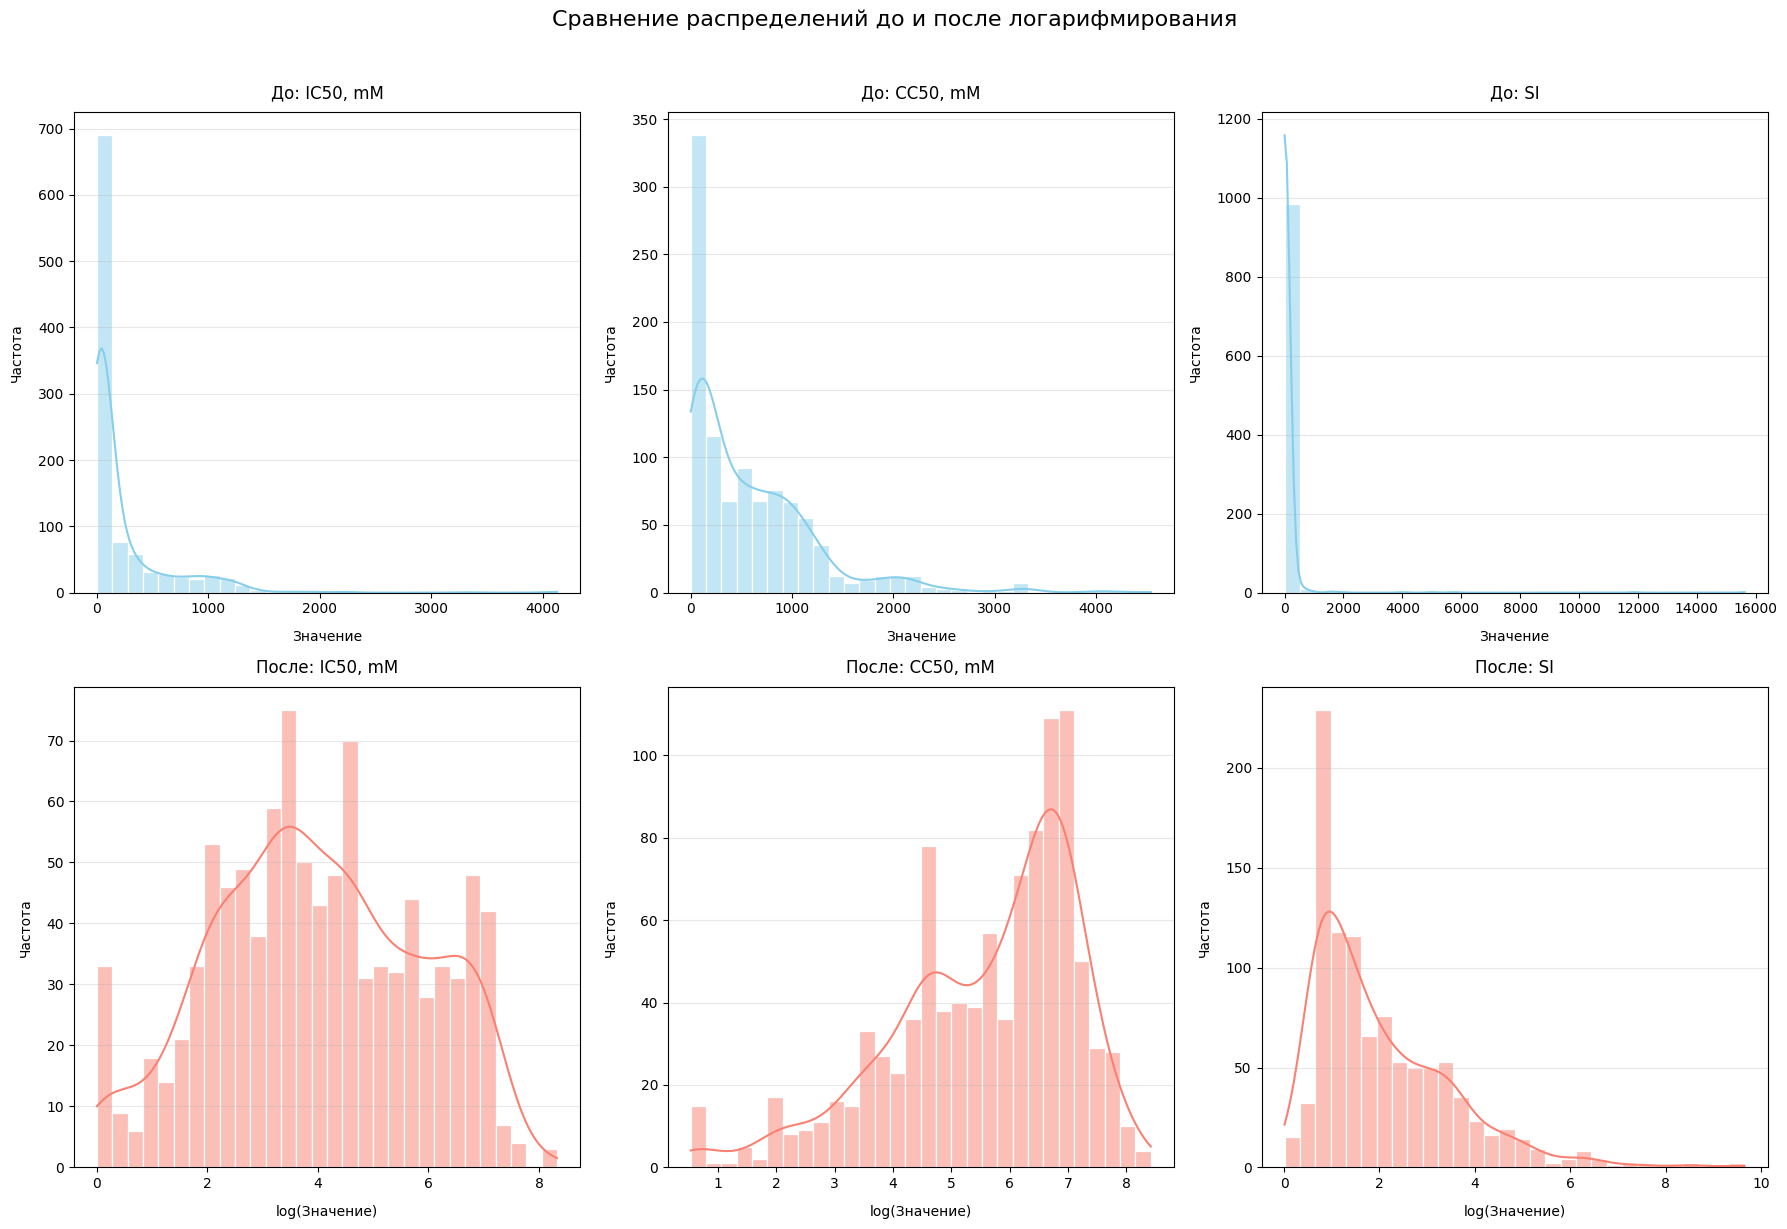

In [ ]:
# Функция для подсчета выбросов (межквартильный размах)
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

# Создаем сводную таблицу сравнения
def create_comparison_table(df, processed_df, original_vars, log_vars):
    stats_list = []

    for orig_var, log_var in zip(original_vars, log_vars):
        # Статистики для исходных данных
        orig_stats = df[orig_var].describe()
        orig_outliers = count_outliers(df[orig_var])

        # Статистики для логарифмированных данных
        log_stats = processed_df[log_var].describe()
        log_outliers = count_outliers(processed_df[log_var])

        # Формируем строку для таблицы
        stats_list.append({
            'Показатель': orig_var.replace(', mM', ''),
            'Среднее': orig_stats['mean'],
            'log_Среднее': log_stats['mean'],
            'Медиана': orig_stats['50%'],
            'log_Медиана': log_stats['50%'],
            'Ст. отклонение': orig_stats['std'],
            'log_Ст. отклонение': log_stats['std'],
            'Выбросы': orig_outliers,
            'log_Выбросы': log_outliers
        })

    # Создаем DataFrame
    comparison_df = pd.DataFrame(stats_list)

    # Переупорядочиваем столбцы для лучшего представления
    column_order = [
        'Показатель',
        'Среднее', 'log_Среднее',
        'Медиана', 'log_Медиана',
        'Ст. отклонение', 'log_Ст. отклонение',
        'Выбросы', 'log_Выбросы'
    ]

    return comparison_df[column_order]

# Определяем имена столбцов
original_vars = ['IC50, mM', 'CC50, mM', 'SI']
log_vars = ['IC50, mM', 'CC50, mM', 'SI']

# Создаем таблицу сравнения
comparison_table = create_comparison_table(df, processed_df, original_vars, log_vars)

# Выводим таблицу
print("\nСравнительная таблица статистик до и после преобразования:")
display(comparison_table)

# Далее идет ваш оригинальный код визуализации без изменений:
# Создаем фигуру для сравнения распределений до и после преобразования
plt.figure(figsize=(18, 12))
plt.suptitle('Сравнение распределений до и после логарифмирования', y=1.02, fontsize=16)

# Гистограммы и боксплоты для исходных и логарифмированных данных
for i, (orig_var, log_var) in enumerate(zip(original_vars, log_vars), 1):
    # Гистограммы (до преобразования)
    plt.subplot(2, 3, i)
    sns.histplot(df[orig_var], kde=True, color='skyblue', bins=30, edgecolor='white')
    plt.title(f'До: {orig_var}', pad=10)
    plt.xlabel('Значение', labelpad=10)
    plt.ylabel('Частота', labelpad=10)
    plt.grid(axis='y', alpha=0.3)

    # Гистограммы (после преобразования)
    plt.subplot(2, 3, i+3)
    sns.histplot(processed_df[log_var], kde=True, color='salmon', bins=30, edgecolor='white')
    plt.title(f'После: {log_var}', pad=10)
    plt.xlabel('log(Значение)', labelpad=10)
    plt.ylabel('Частота', labelpad=10)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Анализ для целевой переменной: IC50, mM



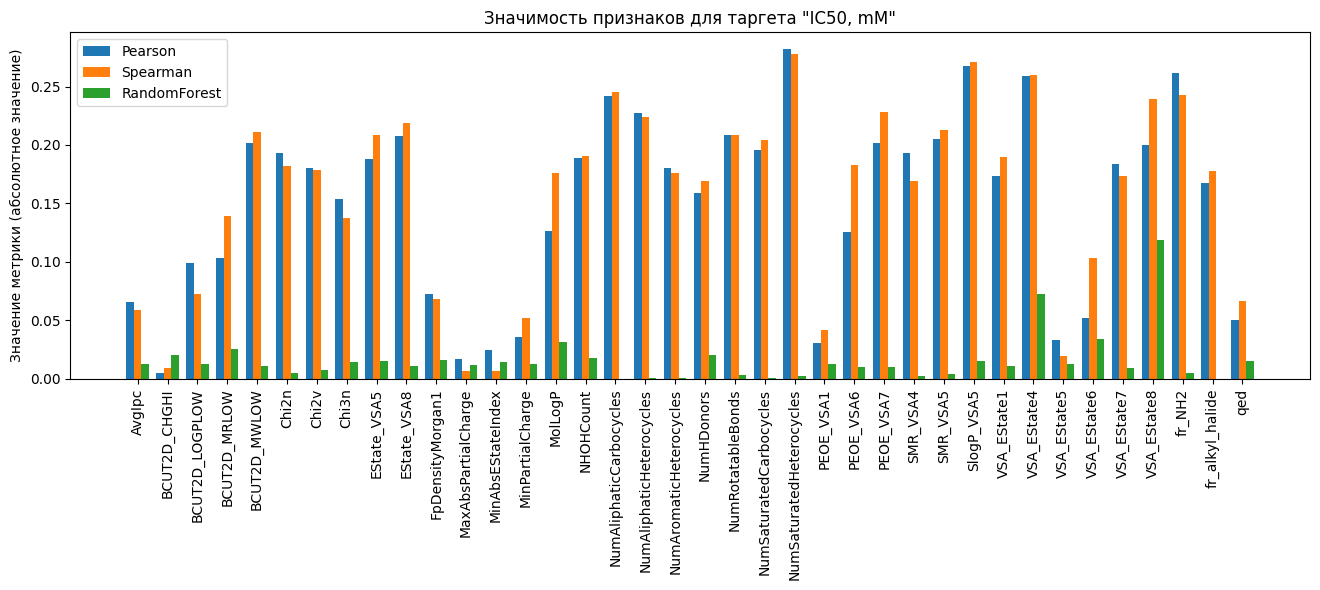


Анализ для целевой переменной: CC50, mM



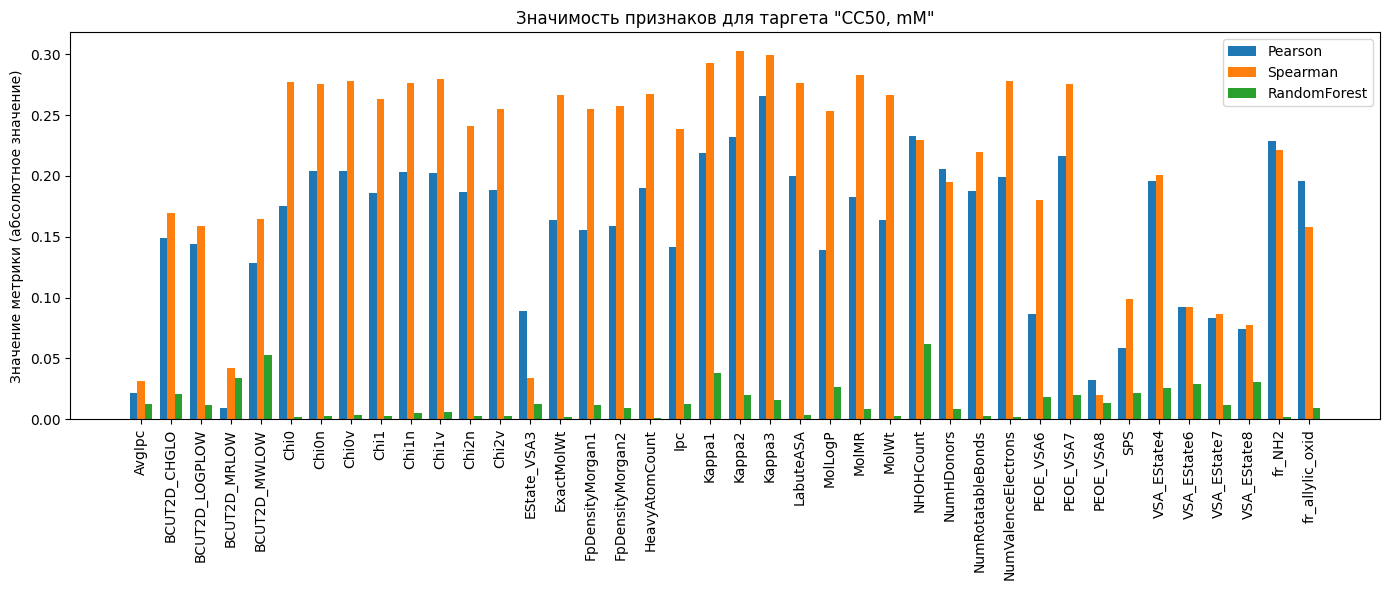


Анализ для целевой переменной: SI



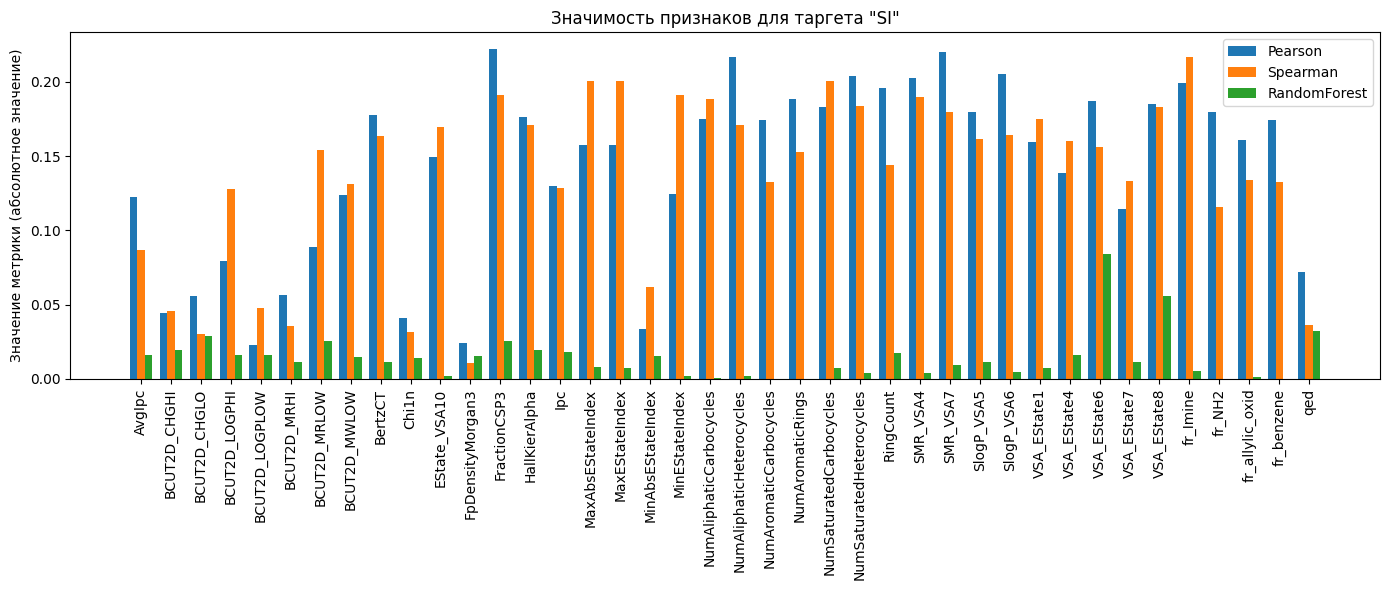

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def plot_top_features_histograms(df, target_columns, top_n=20):
    X = df.drop(columns=target_columns)
    y = df[target_columns]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    for target in target_columns:
        print(f"\n{'='*60}")
        print(f"Анализ для целевой переменной: {target}")
        print(f"{'='*60}\n")

        # Рассчитываем метрики
        pearson_corr = X.corrwith(y[target], method='pearson').abs()
        spearman_corr = X.corrwith(y[target], method='spearman').abs()

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_scaled, y[target])
        rf_importance = pd.Series(rf.feature_importances_, index=X.columns)

        # Выбираем топ-N признаков по каждому методу
        pearson_top = pearson_corr.sort_values(ascending=False).head(top_n).index
        spearman_top = spearman_corr.sort_values(ascending=False).head(top_n).index
        rf_top = rf_importance.sort_values(ascending=False).head(top_n).index

        # Объединяем топовые признаки (уникальные)
        combined_top_features = sorted(set(pearson_top) | set(spearman_top) | set(rf_top))

        # Делаем DataFrame с метриками для выбранных признаков
        scores_df = pd.DataFrame({
            'Pearson': pearson_corr[combined_top_features],
            'Spearman': spearman_corr[combined_top_features],
            'RandomForest': rf_importance[combined_top_features]
        })

        # Строим столбчатую диаграмму с группировкой по признакам
        n_features = len(combined_top_features)
        ind = np.arange(n_features)
        width = 0.25

        plt.figure(figsize=(max(12, n_features * 0.35), 6))

        plt.bar(ind - width, scores_df['Pearson'], width, label='Pearson')
        plt.bar(ind, scores_df['Spearman'], width, label='Spearman')
        plt.bar(ind + width, scores_df['RandomForest'], width, label='RandomForest')

        plt.xticks(ind, combined_top_features, rotation=90)
        plt.ylabel('Значение метрики (абсолютное значение)')
        plt.title(f'Значимость признаков для таргета "{target}"')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Пример вызова:
target_columns = ['IC50, mM', 'CC50, mM', 'SI']
plot_top_features_histograms(processed_df, target_columns, top_n=20)


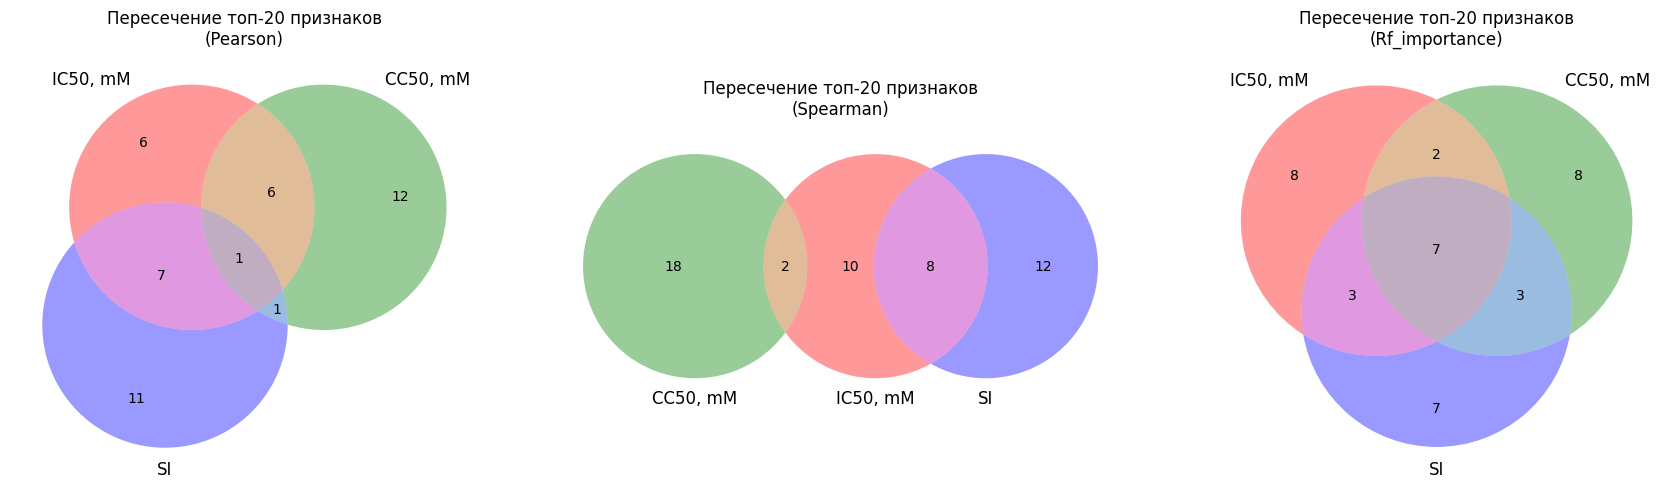

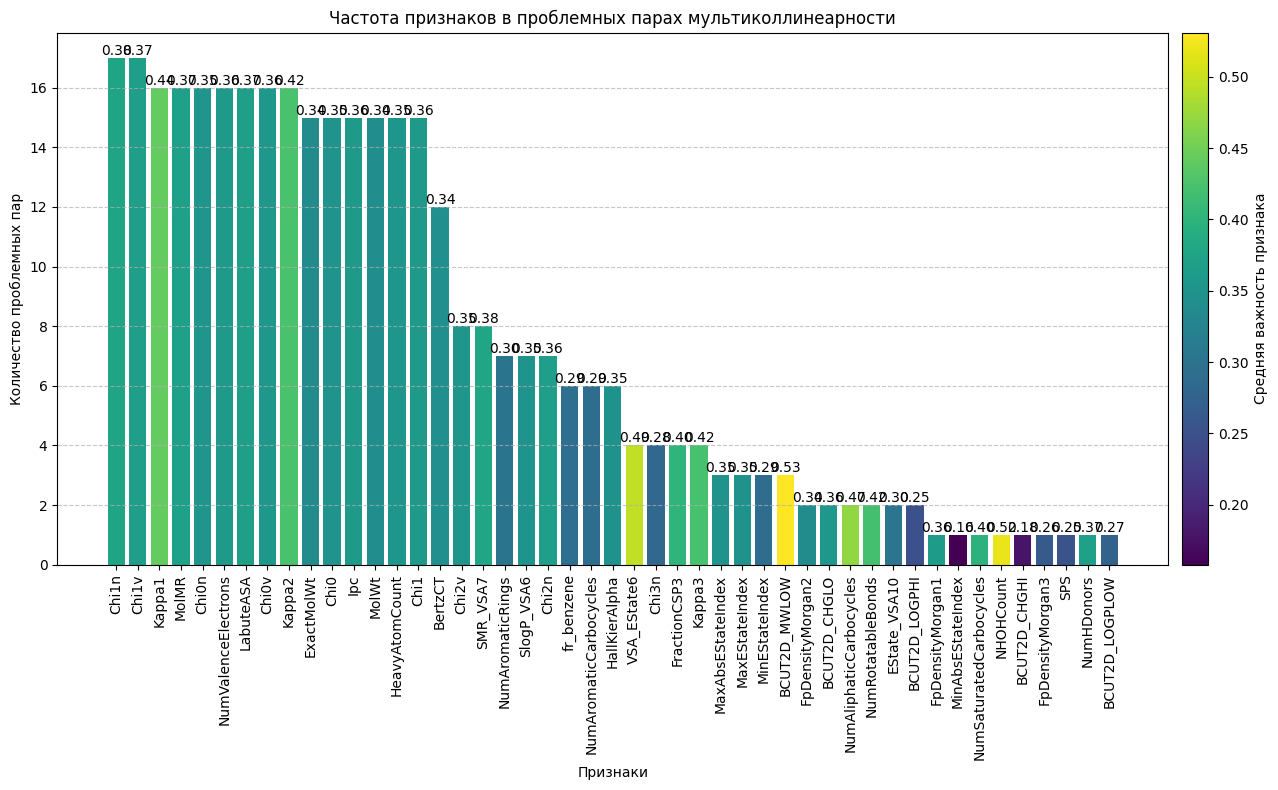

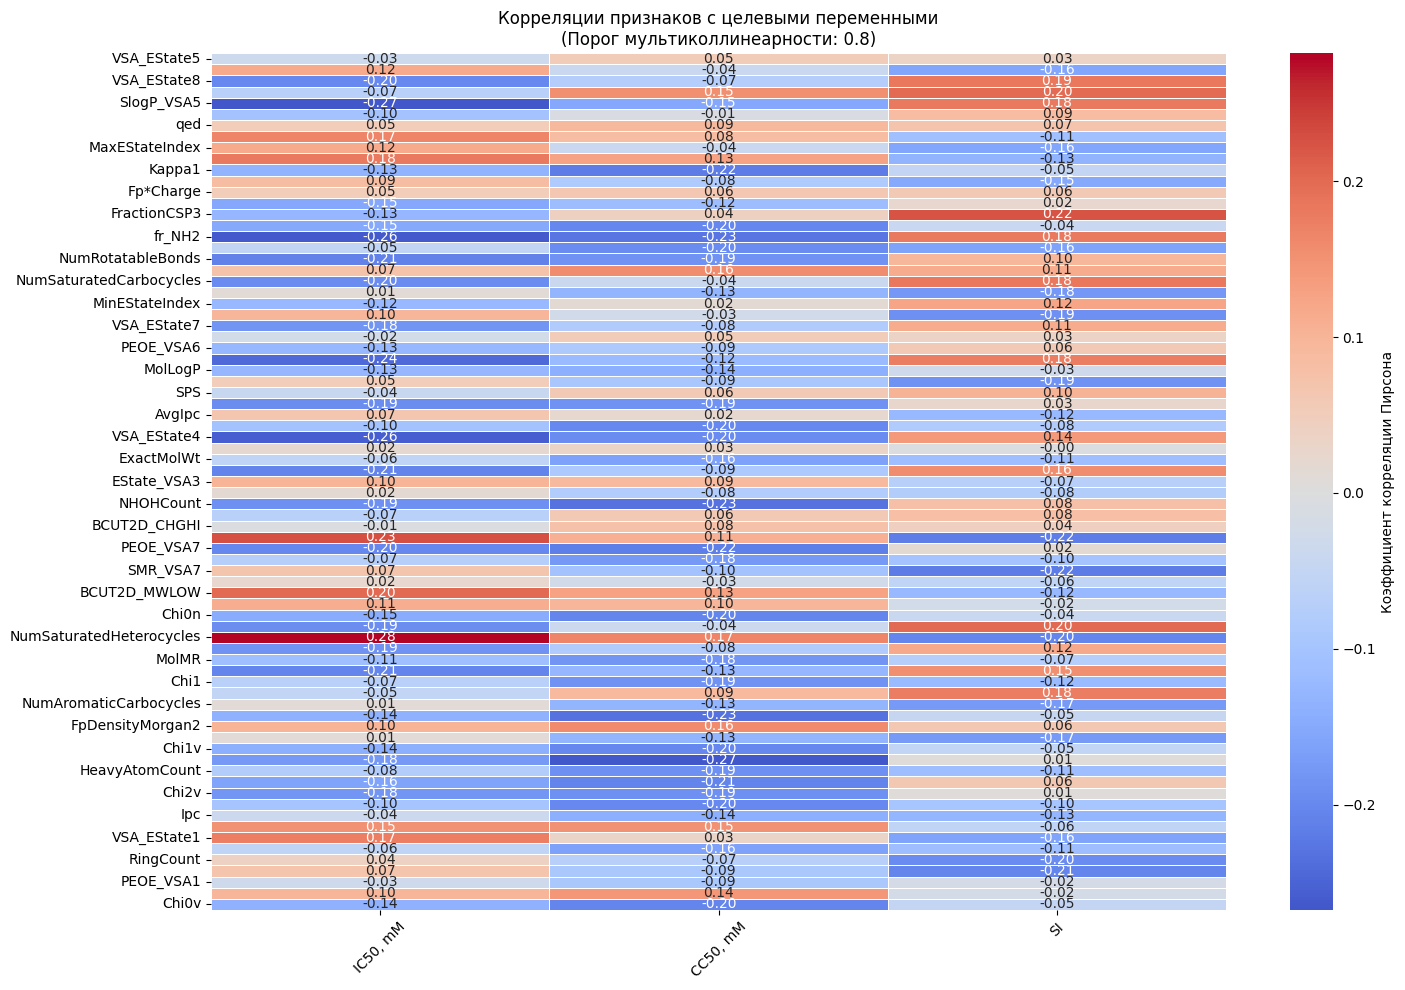

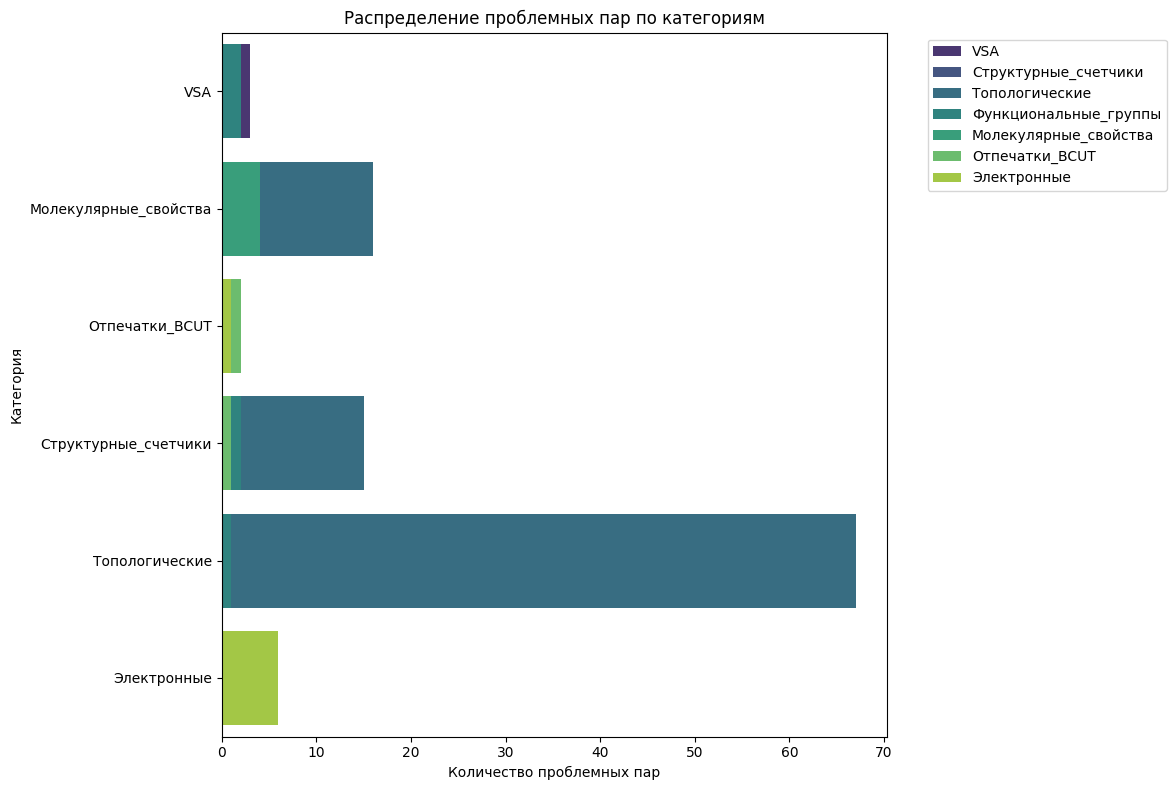


ПРИЗНАКИ В ПРОБЛЕМНЫХ ПАРАХ С КАТЕГОРИЯМИ (СОРТИРОВКА ПО НАЗВАНИЮ)
                                      category  count  importance
BCUT2D_CHGHI                       Электронные      1    0.177861
BCUT2D_CHGLO                       Электронные      2    0.356362
BCUT2D_LOGPHI                      Электронные      2    0.249679
BCUT2D_LOGPLOW                     Электронные      1    0.274529
BCUT2D_MWLOW                    Отпечатки_BCUT      3    0.530878
BertzCT                         Топологические     12    0.341633
Chi0                            Топологические     15    0.350221
Chi0n                           Топологические     16    0.353100
Chi0v                           Топологические     16    0.357563
Chi1                            Топологические     15    0.359774
Chi1n                           Топологические     17    0.375173
Chi1v                           Топологические     17    0.365645
Chi2n                           Топологические      7    0.364966
Chi2v   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from collections import defaultdict
from matplotlib_venn import venn3
from matplotlib.colors import Normalize

def add_categories_to_features(feature_stats, descriptor_categories):
    """
    Добавляет информацию о категориях к статистике признаков

    Параметры:
    feature_stats - словарь с статистикой признаков
    descriptor_categories - словарь категорий признаков
    """
    # Создаем обратный словарь: признак -> категория
    feature_to_category = {}
    for category, features in descriptor_categories.items():
        for feature in features:
            feature_to_category[feature] = category

    # Добавляем категории к статистике признаков
    for feature in feature_stats:
        feature_stats[feature]['category'] = feature_to_category.get(feature, 'Неизвестно')

    return feature_stats

def analyze_collinear_pairs_with_categories(collinear_pairs, feature_stats):
    """
    Анализирует проблемные пары с указанием их категорий

    Параметры:
    collinear_pairs - список проблемных пар (feature1, feature2, correlation)
    feature_stats - словарь с информацией о признаках (включая категории)
    """
    # Создаем список для хранения информации о парах
    pairs_info = []

    for pair in collinear_pairs:
        feat1, feat2, corr = pair
        cat1 = feature_stats.get(feat1, {}).get('category', 'Неизвестно')
        cat2 = feature_stats.get(feat2, {}).get('category', 'Неизвестно')
        imp1 = feature_stats.get(feat1, {}).get('importance', 0)
        imp2 = feature_stats.get(feat2, {}).get('importance', 0)

        pairs_info.append({
            'Признак 1': feat1,
            'Категория 1': cat1,
            'Важность 1': imp1,
            'Признак 2': feat2,
            'Категория 2': cat2,
            'Важность 2': imp2,
            'Корреляция': corr,
            'Одинаковые категории': cat1 == cat2
        })

    # Создаем DataFrame
    pairs_df = pd.DataFrame(pairs_info)

    # Сортируем по корреляции и важности
    pairs_df['Средняя важность'] = (pairs_df['Важность 1'] + pairs_df['Важность 2']) / 2
    pairs_df = pairs_df.sort_values(['Корреляция', 'Средняя важность'], ascending=[False, False])

    return pairs_df

def visualize_category_collisions(pairs_df):
    """
    Визуализирует распределение проблемных пар по категориям
    """
    # Группируем по комбинациям категорий
    category_pairs = pairs_df.groupby(['Категория 1', 'Категория 2']).size().reset_index(name='Количество')

    # Фильтруем только уникальные комбинации (без дубликатов)
    unique_pairs = []
    seen_pairs = set()

    for _, row in category_pairs.iterrows():
        pair = frozenset([row['Категория 1'], row['Категория 2']])
        if pair not in seen_pairs:
            seen_pairs.add(pair)
            unique_pairs.append({
                'Категория 1': row['Категория 1'],
                'Категория 2': row['Категория 2'],
                'Количество': row['Количество']
            })

    unique_pairs_df = pd.DataFrame(unique_pairs)

    # Визуализация
    plt.figure(figsize=(12, 8))
    sns.barplot(data=unique_pairs_df,
                x='Количество',
                y='Категория 1',
                hue='Категория 2',
                dodge=False,
                palette='viridis')
    plt.title('Распределение проблемных пар по категориям')
    plt.xlabel('Количество проблемных пар')
    plt.ylabel('Категория')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def enhanced_feature_stats_table(feature_stats, descriptor_categories):
    """
    Улучшенная таблица статистики признаков с добавлением категорий и сортировкой по названию

    Параметры:
    feature_stats - словарь с статистикой признаков
    descriptor_categories - словарь категорий признаков
    """
    # Создаем обратное отображение (признак -> категория)
    feature_to_category = {}
    for category, features in descriptor_categories.items():
        for feature in features:
            feature_to_category[feature] = category

    # Преобразуем статистику в DataFrame
    stats_df = pd.DataFrame.from_dict(feature_stats, orient='index')

    # Добавляем категории
    stats_df['category'] = stats_df.index.map(lambda x: feature_to_category.get(x, 'Неизвестно'))

    # Оставляем только нужные колонки и сортируем
    stats_df = stats_df[['category', 'count', 'importance']]
    stats_df = stats_df.sort_values('importance', ascending=False)

    # Фильтруем только признаки с проблемными парами (count > 0)
    problem_features_df = stats_df[stats_df['count'] > 0].sort_index()

    return problem_features_df

def full_feature_analysis(df, target_columns, descriptor_categories=None,
                         corr_threshold=0.8, top_n=20, add_combined_features=False,
                         combined_rules=None, scale_large_values=True):

    # 0. Создаём комбинированные признаки при необходимости
    if add_combined_features and combined_rules:
        df = add_combined_features_simple(df, combined_rules)

        # Обновляем descriptor_categories
        if descriptor_categories is not None:
            if 'Комбинированные' not in descriptor_categories:
                descriptor_categories['Комбинированные'] = []

            existing_cols = set(df.columns)
            new_features = [name for name, _ in combined_rules if name in existing_cols]
            descriptor_categories['Комбинированные'].extend(new_features)

    # 1. Проверка и очистка данных перед анализом
    X = df.drop(columns=target_columns)
    y = df[target_columns]

    # Заменяем бесконечности и слишком большие значения
    X = X.replace([np.inf, -np.inf], np.nan)

    if scale_large_values:
        # Масштабируем слишком большие значения
        for col in X.columns:
            max_abs = np.nanmax(np.abs(X[col][X[col].notna()]))
            if max_abs > 1e100:
                X[col] = X[col] / (max_abs / 1e100)

    # Удаляем столбцы, где все значения NaN или Inf
    X = X.dropna(axis=1, how='all')

    # 2. Продолжаем анализ с очищенными данными
    feature_names = X.columns.tolist()
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

    # 4. Функция для оценки важности признаков
    def get_feature_importance(X, y_target):
        pearson = X.corrwith(y_target, method='pearson').abs()
        spearman = X.corrwith(y_target, method='spearman').abs()

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_scaled, y_target)
        rf_importance = pd.Series(rf.feature_importances_, index=feature_names)

        return {
            'pearson': pearson,
            'spearman': spearman,
            'rf_importance': rf_importance
        }

    # 5. Сбор метрик важности для всех целей
    results = {}
    for target in target_columns:
        results[target] = get_feature_importance(X, y[target])

    # 6. Диаграммы Венна для визуализации пересечений
    plt.figure(figsize=(18, 5))

    for i, method in enumerate(['pearson', 'spearman', 'rf_importance'], 1):
        plt.subplot(1, 3, i)

        sets = []
        for target in target_columns:
            top_features = results[target][method].nlargest(top_n).index.tolist()
            sets.append(set(top_features))

        venn3(subsets=sets, set_labels=target_columns)
        plt.title(f'Пересечение топ-{top_n} признаков\n({method.capitalize()})')

    plt.tight_layout()
    plt.show()

    # 7. Поиск мультиколлинеарных пар
    def find_collinear_pairs(df, features, threshold):
        features_list = list(features)
        corr_matrix = df[features_list].corr().abs()
        pairs = []

        for i, j in combinations(corr_matrix.columns, 2):
            if corr_matrix.loc[i, j] > threshold:
                pairs.append((i, j, corr_matrix.loc[i, j]))

        return sorted(pairs, key=lambda x: x[2], reverse=True)

    # 8. Определение важных признаков
    important_features = set()
    for target in target_columns:
        for method in results[target]:
            important_features.update(results[target][method].nlargest(top_n).index.tolist())

    collinear_pairs = find_collinear_pairs(X, important_features, corr_threshold)

    # 9. Анализ проблемных признаков
    feature_stats = defaultdict(lambda: {'count': 0, 'pairs': [], 'importance': 0})

    # Вычисление средней важности признаков
    for feature in important_features:
        total_score = 0
        count = 0
        for target in target_columns:
            for method in results[target]:
                if feature in results[target][method]:
                    normalized_score = results[target][method][feature] / results[target][method].max()
                    total_score += normalized_score
                    count += 1
        feature_stats[feature]['importance'] = total_score / count if count > 0 else 0

    # Подсчет проблемных пар для каждого признака
    for pair in collinear_pairs:
        feat1, feat2, corr = pair
        feature_stats[feat1]['count'] += 1
        feature_stats[feat1]['pairs'].append((feat2, corr))
        feature_stats[feat2]['count'] += 1
        feature_stats[feat2]['pairs'].append((feat1, corr))

    # 10. Визуализация проблемных признаков
    stats_df = pd.DataFrame.from_dict(feature_stats, orient='index')
    stats_df['feature'] = stats_df.index
    stats_df = stats_df[stats_df['count'] > 0].sort_values('count', ascending=False)

    if not stats_df.empty:
        plt.figure(figsize=(14, 8))

        # Нормализация для цветовой карты
        norm = Normalize(vmin=stats_df['importance'].min(),
                         vmax=stats_df['importance'].max())
        colors = plt.cm.viridis(norm(stats_df['importance']))

        # Построение столбчатой диаграммы
        bars = plt.bar(range(len(stats_df)), stats_df['count'], color=colors)

        # Настройка осей
        plt.xticks(range(len(stats_df)), stats_df['feature'], rotation=90)

        # Настройка цветовой шкалы
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
        cbar.set_label('Средняя важность признака')

        # Добавление подписей
        for idx, bar in enumerate(bars):
            importance = stats_df.iloc[idx]['importance']
            plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
                     f'{importance:.2f}',
                     ha='center', va='bottom')

        plt.title('Частота признаков в проблемных парах мультиколлинеарности')
        plt.xlabel('Признаки')
        plt.ylabel('Количество проблемных пар')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 11. Тепловая карта корреляций с целевыми переменными
    plt.figure(figsize=(15, 10))

    corr_data = pd.DataFrame()
    for target in target_columns:
        corr_data[target] = X[list(important_features)].corrwith(y[target], method='pearson')

    sns.heatmap(corr_data,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt=".2f",
                linewidths=.5,
                cbar_kws={'label': 'Коэффициент корреляции Пирсона'})

    plt.title(f'Корреляции признаков с целевыми переменными\n(Порог мультиколлинеарности: {corr_threshold})')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 12. Добавляем анализ по категориям, если предоставлены категории
    if descriptor_categories is not None:
        # Добавляем информацию о категориях
        feature_stats_with_cats = add_categories_to_features(
            dict(feature_stats),
            descriptor_categories
        )

        # Анализируем проблемные пары с категориями
        pairs_df = analyze_collinear_pairs_with_categories(
            collinear_pairs,
            feature_stats_with_cats
        )

        # Визуализируем распределение по категориям
        visualize_category_collisions(pairs_df)

        # Выводим улучшенную таблицу признаков
        print("\n" + "="*80)
        print("ПРИЗНАКИ В ПРОБЛЕМНЫХ ПАРАХ С КАТЕГОРИЯМИ (СОРТИРОВКА ПО НАЗВАНИЮ)")
        print("="*80)
        problem_features_df = enhanced_feature_stats_table(
            dict(feature_stats),
            descriptor_categories
        )
        print(problem_features_df.to_string())

        # Выводим топ проблемных пар с категориями
        print("\n" + "="*80)
        print("ТОП-20 САМЫХ ПРОБЛЕМНЫХ ПАР С КАТЕГОРИЯМИ")
        print("="*80)
        display_cols = ['Признак 1', 'Категория 1', 'Важность 1',
                       'Признак 2', 'Категория 2', 'Важность 2',
                       'Корреляция', 'Одинаковые категории']
        print(pairs_df[display_cols].head(20).to_string(index=False))

        # Анализ по категориям
        print("\n" + "="*80)
        print("СТАТИСТИКА ПО КАТЕГОРИЯМ")
        print("="*80)

        # Группируем по категории первого признака
        category_stats = pairs_df.groupby('Категория 1').agg(
            Средняя_корреляция=('Корреляция', 'mean'),
            Максимальная_корреляция=('Корреляция', 'max'),
            Количество_пар=('Корреляция', 'count')
        ).sort_values('Количество_пар', ascending=False)

        print("\nПо первому признаку в паре:")
        print(category_stats.to_string())

        # Дополнительная статистика по категориям второго признака
        category_stats2 = pairs_df.groupby('Категория 2').agg(
            Средняя_корреляция=('Корреляция', 'mean'),
            Максимальная_корреляция=('Корреляция', 'max'),
            Количество_пар=('Корреляция', 'count')
        ).sort_values('Количество_пар', ascending=False)

        print("\nПо второму признаку в паре:")
        print(category_stats2.to_string())

        # Общая статистика по всем категориям
        all_categories = pd.concat([
            pairs_df['Категория 1'].rename('Категория'),
            pairs_df['Категория 2'].rename('Категория')
        ])

        category_summary = all_categories.value_counts().to_frame('Общее_количество')
        print("\nОбщее количество упоминаний категорий:")
        print(category_summary.to_string())

    # 13. Вывод статистики
    print("\n" + "=" * 80)
    print("Детальная статистика анализа признаков")
    print("=" * 80)

    # Статистика по методам
    for method in ['pearson', 'spearman', 'rf_importance']:
        print(f"\nМетод: {method.upper()}")

        sets = []
        for target in target_columns:
            top_features = set(results[target][method].nlargest(top_n).index.tolist())
            sets.append(top_features)

        intersection_all = set.intersection(*sets)
        intersection_any_two = set()
        for i, j in combinations(range(len(sets)), 2):
            intersection_any_two.update(sets[i] & sets[j])

        print(f"Признаки, значимые для всех целей: {len(intersection_all)}")
        print(f"Признаки, значимые для любых двух целей: {len(intersection_any_two)}")

        for i, target in enumerate(target_columns):
            unique = sets[i] - set.union(*[s for j, s in enumerate(sets) if j != i])
            print(f"Уникальные признаки для {target}: {len(unique)}")

    # Статистика по мультиколлинеарности
    print("\n" + "-" * 80)
    print("Анализ мультиколлинеарности")
    print("-" * 80)

    print(f"\nВсего значимых признаков: {len(important_features)}")
    print(f"Найдено проблемных пар (корр. > {corr_threshold}): {len(collinear_pairs)}")

    if not stats_df.empty:
        print("\nТоп-20 самых проблемных признаков:")
        for i, row in stats_df.head(20).iterrows():
            print(f"{i}:")
            print(f"   Количество проблемных пар: {row['count']}")
            print(f"   Средняя важность: {row['importance']:.4f}")
            print("   Самые сильные корреляции:")
            for other_feat, corr in sorted(row['pairs'], key=lambda x: x[1], reverse=True)[:3]:
                print(f"     - с {other_feat}: {corr:.3f}")

    print("\nТоп-20 самых проблемных пар:")
    for i, (feat1, feat2, corr) in enumerate(collinear_pairs[:20], 1):
        print(f"{i}. {feat1} и {feat2}: {corr:.3f}")
        print(f"   Важность {feat1}: {feature_stats[feat1]['importance']:.4f}")
        print(f"   Важность {feat2}: {feature_stats[feat2]['importance']:.4f}")

    # 14. Возвращаем результаты анализа
    return {
        'results': results,
        'important_features': list(important_features),
        'collinear_pairs': collinear_pairs,
        'feature_stats': dict(feature_stats),
        'correlation_matrix': corr_data,
        'pairs_with_categories': pairs_df if descriptor_categories else None,
        'problem_features_with_categories': problem_features_df if descriptor_categories else None
    }

def add_combined_features_simple(df, combined_rules=None):
    """
    Простое добавление комбинированных признаков по заданным правилам

    Параметры:
    df - исходный DataFrame
    combined_rules - список кортежей (новое_название, формула)

    Возвращает:
    DataFrame с добавленными признаками (без бесконечных значений)
    """
    if combined_rules is None:
        return df

    new_features = {}

    for name, formula in combined_rules:
        try:
            # Вычисляем новый признак
            new_feature = df.eval(formula)

            # Заменяем бесконечные значения на NaN
            new_feature.replace([np.inf, -np.inf], np.nan, inplace=True)

            # Проверяем, что значения не слишком большие
            max_abs = np.nanmax(np.abs(new_feature[new_feature.notna()]))
            if max_abs > 1e100:  # Если значения слишком большие
                new_feature = new_feature / (max_abs / 1e100)  # Масштабируем

            new_features[name] = new_feature

        except Exception as e:
            print(f"Не удалось вычислить {name} = {formula}. Ошибка: {str(e)}")

    # Добавляем новые признаки к исходным данным
    for name, values in new_features.items():
        df[name] = values

    return df

def combined_features_stats(df, combined_features, targets, feature_importances):
    """
    Считаем статистику по комбинированным признакам для каждого target.

    df - исходные данные с комбинированными признаками
    combined_features - список имён комбинированных признаков
    targets - список имён целевых переменных
    feature_importances - словарь {target: pd.Series(importance)}, где индекс - признаки
    """
    stats_list = []
    for target in targets:
        # Корреляции для комбинированных признаков с target
        corr_pearson = df[combined_features].corrwith(df[target], method='pearson')
        corr_spearman = df[combined_features].corrwith(df[target], method='spearman')

        # Важности признаков для данного target
        imp = feature_importances.get(target, pd.Series(dtype=float))
        imp = imp.reindex(combined_features).fillna(0)

        # Для каждого признака считаем число сильно коррелированных признаков (с другими комбинированными)
        corr_matrix = df[combined_features].corr(method='pearson').abs()
        strong_corr_counts = (corr_matrix > 0.9).sum() - 1  # -1 чтобы не считать сам признак

        for feat in combined_features:
            stats_list.append({
                'target': target,
                'feature': feat,
                'corr_pearson': corr_pearson.get(feat, np.nan),
                'corr_spearman': corr_spearman.get(feat, np.nan),
                'importance': imp.get(feat, 0),
                'strong_corr_count': strong_corr_counts.get(feat, 0)
            })
    return pd.DataFrame(stats_list)


# Пример использования:
target_columns = ['IC50, mM', 'CC50, mM', 'SI']

# Группировка дескрипторов по категориям
descriptor_categories = {
    'Электронные': [
        'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex',
        'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
        'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW'
    ],
    'Отпечатки_BCUT': [
        'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
        'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'
    ],
    'Топологические': [
        'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v',
        'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc',
        'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA'
    ],
    'VSA': [
        'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
        'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
        'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4',
        'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10',
        'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5',
        'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10',
        'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3',
        'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
        'EState_VSA9', 'EState_VSA10', 'EState_VSA11', 'VSA_EState1', 'VSA_EState2',
        'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7',
        'VSA_EState8', 'VSA_EState9', 'VSA_EState10'
    ],
    'Молекулярные_свойства': [
        'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'FractionCSP3',
        'MolLogP', 'MolMR', 'TPSA'
    ],
    'Структурные_счетчики': [
        'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
        'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles',
        'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
        'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
        'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
        'NumSaturatedRings', 'RingCount', 'NumValenceElectrons',
        'NumRadicalElectrons'
    ],
    'Функциональные_группы': [
        col for col in processed_df.columns if col.startswith('fr_')
    ]
}

# Определяем правила для создания новых признаков
combined_rules = [
    ('ArN*LogP', 'fr_Ar_N * MolLogP'),
    ('MW/TPSA', 'MolWt / TPSA'),
    ('Fp*Charge', 'FpDensityMorgan1 * MaxAbsPartialCharge')
]

# Создаем DataFrame с комбинированными признаками
processed_df_with_combined = add_combined_features_simple(processed_df, combined_rules)

# Запускаем анализ с созданием новых признаков
results = full_feature_analysis(
    processed_df_with_combined,  # передаем уже с комбинированными признаками
    target_columns,
    descriptor_categories=descriptor_categories,
    add_combined_features=False,  # уже добавили вручную
    combined_rules=None,
    scale_large_values=True
)

# Формируем feature_importances для комбинированных признаков
feature_importances = {}
for target in target_columns:
    rf_imp = results['results'][target]['rf_importance']
    feature_importances[target] = rf_imp

# Список комбинированных признаков
combined_features = [name for name, _ in combined_rules]

# Получаем статистику по комбинированным признакам
combined_stats_df = combined_features_stats(
    processed_df_with_combined,
    combined_features,
    target_columns,
    feature_importances
)

print(combined_stats_df)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations

# --- Функции ---

# Функция для расчета VIF
def calculate_vif(df_subset: pd.DataFrame) -> dict:
    """
    Рассчитывает Variance Inflation Factor (VIF) для числовых признаков в DataFrame.
    Масштабирует данные перед расчетом VIF для стабильности.
    Обрабатывает случаи с недостаточным количеством столбцов или строк, а также совершенную коллинеарность.

    Параметры:
    ----------
    df_subset : pd.DataFrame
        DataFrame, содержащий признаки, для которых нужно рассчитать VIF.

    Возвращает:
    -----------
    dict
        Словарь, где ключи - это названия признаков, а значения - их VIF.
        Возвращает пустой словарь в случае ошибок или недостаточного количества данных.
    """
    # Убедимся, что работаем только с числовыми столбцами
    numeric_df = df_subset.select_dtypes(include=np.number)

    # Удаляем строки с NaN для расчета VIF, так как VIF не работает с пропусками
    numeric_df = numeric_df.dropna()

    if len(numeric_df.columns) < 2 or len(numeric_df) == 0:
        return {} # Возвращаем пустой словарь, если недостаточно столбцов или строк

    try:
        # Масштабирование данных перед расчетом VIF для стабильности
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(numeric_df)

        vifs = {col: variance_inflation_factor(scaled_features, i)
                for i, col in enumerate(numeric_df.columns)}
        return vifs
    except Exception as e:
        # Например, совершенная коллинеарность может вызвать ошибку.
        # В таком случае VIF будет бесконечным, и мы хотим это обработать.
        # Обнаруживаем признаки, вызывающие бесконечный VIF (если они есть)
        problem_cols = []
        for i, col in enumerate(numeric_df.columns):
            try:
                vif_val = variance_inflation_factor(scaled_features, i)
                if np.isinf(vif_val):
                    problem_cols.append(col)
            except:
                problem_cols.append(col) # Если вылетает ошибка на конкретном признаке

        # Если есть проблемные колонки, устанавливаем их VIF в inf
        vifs_with_inf = {col: np.inf if col in problem_cols else variance_inflation_factor(scaled_features, i)
                         for i, col in enumerate(numeric_df.columns)}
        return vifs_with_inf

# Вспомогательная функция для расчета важности признаков (заглушка)
# Для реального проекта тут лучше использовать корреляции с целевыми,
# или важность из простых моделей, например, Random Forest.
def calculate_feature_importance_placeholder(df: pd.DataFrame, target_columns: list) -> dict:
    """
    Рассчитывает "важность" признаков как среднее абсолютное значение корреляции
    с целевыми переменными. Заглушка, можно заменить более сложным методом.

    Параметры:
    ----------
    df : pd.DataFrame
        DataFrame с признаками и целевыми переменными.
    target_columns : list
        Список названий целевых колонок.

    Возвращает:
    -----------
    dict
        Словарь, где ключи - названия признаков, значения - их важность.
    """
    importance = {}
    features = [col for col in df.columns if col not in target_columns]
    for feature in features:
        # Убедимся, что признак и целевые колонки существуют и не содержат только NaN
        valid_targets = [target for target in target_columns if target in df.columns and df[feature].notna().any() and df[target].notna().any()]

        corrs = []
        for target in valid_targets:
            # Dropna для пары признак-целевая перед корреляцией
            temp_df = df[[feature, target]].dropna()
            if not temp_df.empty:
                corrs.append(temp_df[feature].corr(temp_df[target]))

        importance[feature] = np.mean(np.abs(corrs)) if corrs else 0
    return importance

# Функция для удаления высоко коррелированных признаков с уточненной логикой
def remove_highly_correlated_features_by_importance_refined(
    df: pd.DataFrame, feature_importance: dict, target_columns: list, corr_threshold: float = 0.98
) -> tuple[pd.DataFrame, list, list, list]:
    """
    Удаляет высоко коррелированные признаки на основе их важности.
    Сначала обрабатывает константные признаки или признаки, состоящие только из NaN.
    Затем итеративно удаляет один признак из пары с корреляцией >= corr_threshold,
    сохраняя более важный.

    Параметры:
    ----------
    df : pd.DataFrame
        Исходный DataFrame.
    feature_importance : dict
        Словарь важности признаков.
    target_columns : list
        Список названий целевых колонок.
    corr_threshold : float
        Пороговое значение для абсолютной корреляции.

    Возвращает:
    -----------
    tuple
        (df_final, removed_perfectly_correlated_features,
         features_kept_from_perfect_corr, features_remaining_not_involved_in_perfect_corr)
    """
    df_clean = df.copy()
    initial_features = [col for col in df_clean.columns if col not in target_columns]

    if not initial_features:
        print("Нет признаков для анализа корреляции.")
        return df_clean, [], [], []

    # 1. Сначала обрабатываем константные признаки или признаки с NaN
    constant_or_nan_features_to_drop = set()
    for col in initial_features:
        # Проверяем, если все значения NaN или если уникальных значений 1 и это не NaN
        if df_clean[col].isnull().all() or (df_clean[col].nunique(dropna=False) == 1 and df_clean[col].isnull().any() == False):
            constant_or_nan_features_to_drop.add(col)

    candidate_features_for_corr = [f for f in initial_features if f not in constant_or_nan_features_to_drop]

    removed_perfectly_correlated_features = list(constant_or_nan_features_to_drop)
    features_kept_from_perfect_corr = []
    features_remaining_not_involved_in_perfect_corr = []

    resolved_features_in_perfect_pairs = set()

    # Итеративно ищем и удаляем высоко коррелированные пары
    while True:
        current_features_to_check = [f for f in candidate_features_for_corr if f not in resolved_features_in_perfect_pairs]

        if len(current_features_to_check) < 2:
            break

        # Рассчитываем корреляцию только для текущих кандидатов, очищая NaN для корреляции
        current_corr_matrix = df_clean[current_features_to_check].corr().abs()

        high_corr_pairs_in_iteration = []
        for f1, f2 in combinations(current_features_to_check, 2):
            corr_val = current_corr_matrix.loc[f1, f2]
            if pd.isna(corr_val): continue # Пропускаем, если корреляция не может быть рассчитана (например, из-за NaN)

            if corr_val >= corr_threshold:
                high_corr_pairs_in_iteration.append((f1, f2, corr_val))

        if not high_corr_pairs_in_iteration:
            break # Нет больше высоко коррелированных пар, выходим

        high_corr_pairs_in_iteration.sort(key=lambda x: x[2], reverse=True) # Сортируем по корреляции

        pair_resolved_this_iteration = False
        for f1, f2, corr_val in high_corr_pairs_in_iteration:
            if f1 in resolved_features_in_perfect_pairs or f2 in resolved_features_in_perfect_pairs:
                continue # Одна из колонок уже была обработана

            imp1 = feature_importance.get(f1, 0)
            imp2 = feature_importance.get(f2, 0)

            if imp1 < imp2: # Удаляем менее важный признак
                removed_perfectly_correlated_features.append(f1)
                features_kept_from_perfect_corr.append(f2)
            elif imp2 < imp1:
                removed_perfectly_correlated_features.append(f2)
                features_kept_from_perfect_corr.append(f1)
            else: # Если важность одинакова, удаляем тот, что идет раньше по алфавиту для детерминированности
                if f1 < f2:
                    removed_perfectly_correlated_features.append(f1)
                    features_kept_from_perfect_corr.append(f2)
                else:
                    removed_perfectly_correlated_features.append(f2)
                    features_kept_from_perfect_corr.append(f1)

            resolved_features_in_perfect_pairs.add(f1)
            resolved_features_in_perfect_pairs.add(f2)
            pair_resolved_this_iteration = True

        if not pair_resolved_this_iteration:
            break # Если в этой итерации не было разрешено ни одной пары, выходим

    # Формируем окончательный список оставшихся признаков
    final_retained_features_set = set(features_kept_from_perfect_corr)
    for f in candidate_features_for_corr:
        if f not in removed_perfectly_correlated_features and f not in final_retained_features_set:
            features_remaining_not_involved_in_perfect_corr.append(f)

    all_retained_features = list(final_retained_features_set.union(set(features_remaining_not_involved_in_perfect_corr)))
    df_final = df_clean[[col for col in df_clean.columns if col in all_retained_features or col in target_columns]]

    return df_final, removed_perfectly_correlated_features, features_kept_from_perfect_corr, features_remaining_not_involved_in_perfect_corr


# --- Основная функция для запуска анализа агрегации ---
def run_aggregation_analysis(processed_df: pd.DataFrame, target_columns: list, descriptor_categories: dict) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Выполняет комплексный анализ и агрегацию признаков двумя методами (PCA и Ручная/Композитная).
    Сравнивает VIF метрики до и после агрегации.

    Параметры:
    ----------
    processed_df : pd.DataFrame
        Исходный предобработанный DataFrame с данными.
    target_columns : list
        Список названий целевых колонок.
    descriptor_categories : dict
        Словарь, категоризирующий дескрипторы.

    Возвращает:
    -----------
    tuple[pd.DataFrame, pd.DataFrame]
        Кортеж из двух DataFrame:
        - df_after_pca: DataFrame после PCA агрегации.
        - df_after_manual: DataFrame после ручной/композитной агрегации.
    """
    print("--- Запуск анализа агрегации признаков ---")

    # Рассчитаем важность для начального DataFrame (после первичной предобработки)
    initial_feature_importance = calculate_feature_importance_placeholder(processed_df, target_columns)

    # --- 1. Удаление совершенно коррелированных признаков (0.98 - 1.0) ---
    print("\n--- Шаг 1: Удаление совершенно коррелированных признаков (Корреляция >= 0.98) ---")

    initial_num_features = processed_df.shape[1] - len(target_columns)
    df_step1, removed_perfectly_correlated, features_kept_from_perfect_corr, features_remaining_not_involved_in_perfect_corr = remove_highly_correlated_features_by_importance_refined(
        processed_df, initial_feature_importance, target_columns, corr_threshold=0.98
    )
    current_num_features = df_step1.shape[1] - len(target_columns)

    print(f"Исходное количество признаков (без целевых): {initial_num_features}")
    print(f"Количество признаков после удаления высоко коррелированных: {current_num_features}")
    print(f"Признаки, удаленные (совершенно коррелированные/константные): {removed_perfectly_correlated}")
    print(f"Признаки, оставленные из 'идеальных' пар: {features_kept_from_perfect_corr}")
    print(f"Признаки, не участвовавшие в 'идеальных' парах: {features_remaining_not_involved_in_perfect_corr}")
    print(f"Всего удалено признаков на Шаге 1: {len(removed_perfectly_correlated)}")

    # Повторный расчет VIF после Шага 1
    features_only_df_step1 = df_step1.drop(columns=target_columns, errors='ignore')
    vifs_step1 = calculate_vif(features_only_df_step1)

    # Сбор метрик VIF для Шага 1
    high_vif_step1_values = [vif for vif in vifs_step1.values() if not np.isinf(vif) and vif > 10]
    high_vif_step1_count = len(high_vif_step1_values)
    inf_vif_step1_count = sum(1 for vif in vifs_step1.values() if np.isinf(vif))
    avg_high_vif_step1 = np.mean(high_vif_step1_values) if high_vif_step1_values else 0

    print(f"\nКоличество признаков с VIF = inf после Шага 1: {inf_vif_step1_count}")
    print(f"Количество признаков с VIF > 10 (но не inf) после Шага 1: {high_vif_step1_count}")
    print(f"Средний VIF для признаков с VIF > 10 (но не inf) после Шага 1: {avg_high_vif_step1:.2f}")

    # --- 2. Агрегация Групп Признаков: PCA против Ручной Агрегации ---
    print("\n--- Шаг 2: Агрегация групп признаков (PCA vs. Ручная) ---")

    # Группы для агрегации (исключаем VSA из PCA агрегации по умолчанию, так как их много и они часто уникальны)
    # Используем те же группы, что и в вашем коде
    groups_to_aggregate_for_methods = {
        'Топологические': [f for f in descriptor_categories['Топологические'] if f in df_step1.columns],
        'Отпечатки_BCUT': [f for f in descriptor_categories['Отпечатки_BCUT'] if f in df_step1.columns]
    }

    # --- PCA Агрегация ---
    df_pca_result = df_step1.copy()
    pca_removed_features = []

    print("\n--- Результаты PCA Агрегации ---")
    for group_name, features in groups_to_aggregate_for_methods.items():
        features_present = [f for f in features if f in df_pca_result.columns and f not in target_columns]

        if len(features_present) > 1:
            try:
                # Масштабирование данных для PCA
                scaler = StandardScaler()
                # Удаляем строки с NaN только для PCA, чтобы не повлиять на весь DataFrame
                temp_df_for_pca = df_pca_result[features_present].dropna()

                if temp_df_for_pca.empty:
                    print(f"   Внимание: Для группы '{group_name}' все строки содержат NaN после отбора, PCA не может быть применен.")
                    continue

                scaled_data = scaler.fit_transform(temp_df_for_pca)
                pca = PCA(n_components=1) # Берем только 1 главную компоненту
                pca_component = pca.fit_transform(scaled_data)

                new_col_name = f"{group_name}_PCA_1comp"
                # Создаем Series, чтобы правильно совместить по индексу
                pca_series = pd.Series(pca_component.flatten(), index=temp_df_for_pca.index)
                df_pca_result[new_col_name] = pca_series

                # Заполняем NaN в новой колонке, если они появились из-за dropna() в temp_df_for_pca
                if df_pca_result[new_col_name].isnull().any():
                    df_pca_result[new_col_name].fillna(df_pca_result[new_col_name].mean(), inplace=True)

                df_pca_result.drop(columns=features_present, inplace=True)
                pca_removed_features.extend(features_present)

                print(f"   Успешно создана PCA компонента для {group_name}: {new_col_name} (объясненная дисперсия: {pca.explained_variance_ratio_[0]*100:.2f}%)")
            except Exception as e:
                print(f"   Ошибка при PCA для {group_name}: {e}")
                print(f"   Пропускаем PCA для {group_name}, признаки: {features_present}")
        elif len(features_present) == 1:
            print(f"   Группа '{group_name}' содержит только один признак '{features_present[0]}', PCA не требуется.")
        else:
            print(f"   В группе '{group_name}' нет признаков для PCA или они уже были удалены на предыдущем шаге.")

    # Очистка NaN в df_pca_result после PCA (если какие-то NaN остались, например, в других колонках)
    for col in df_pca_result.columns:
        if col not in target_columns and df_pca_result[col].isnull().any():
            if df_pca_result[col].dtype == 'float64':
                df_pca_result[col].fillna(df_pca_result[col].mean(), inplace=True)
            else: # Для нечисловых (редко, но бывает)
                mode_val = df_pca_result[col].mode()
                if not mode_val.empty:
                    df_pca_result[col].fillna(mode_val[0], inplace=True)


    # Расчет VIF для df_pca_result
    features_only_df_pca_result = df_pca_result.drop(columns=target_columns, errors='ignore')
    vifs_pca_result = calculate_vif(features_only_df_pca_result)

    high_vif_pca_result_values = [vif for vif in vifs_pca_result.values() if not np.isinf(vif) and vif > 10]
    high_vif_pca_result_count = len(high_vif_pca_result_values)
    inf_vif_pca_result_count = sum(1 for vif in vifs_pca_result.values() if np.isinf(vif))
    avg_high_vif_pca_result = np.mean(high_vif_pca_result_values) if high_vif_pca_result_values else 0

    print(f"\nКоличество признаков после PCA: {df_pca_result.shape[1] - len(target_columns)}")
    print(f"Количество признаков с VIF = inf после PCA: {inf_vif_pca_result_count}")
    print(f"Количество признаков с VIF > 10 (но не inf) после PCA: {high_vif_pca_result_count}")
    print(f"Средний VIF для признаков с VIF > 10 (но не inf) после PCA: {avg_high_vif_pca_result:.2f}")
    print("VIF новых агрегированных PCA признаков:")
    for col in features_only_df_pca_result.columns:
        if '_PCA_1comp' in col:
            print(f"   {col}: {vifs_pca_result.get(col, 'N/A'):.2f}")


    # --- Ручная/Композитная Агрегация ---
    df_manual_result = df_step1.copy()
    manual_removed_features = []

    print("\n--- Результаты Ручной/Композитной Агрегации ---")

    # 1. Топологические: Создадим "Chi_Agg" (среднее по Chi-индексам) и "Kappa_Agg" (среднее по Kappa-индексам)
    chi_features_all = ['Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v']
    chi_features = [f for f in chi_features_all if f in df_manual_result.columns]

    kappa_features_all = ['Kappa1', 'Kappa2', 'Kappa3']
    kappa_features = [f for f in kappa_features_all if f in df_manual_result.columns]

    if chi_features:
        # Убедимся, что есть не-NaN значения для расчета среднего
        df_manual_result['Chi_Agg'] = df_manual_result[chi_features].mean(axis=1)
        # Заполняем NaN, если они появились (например, если все исходные Chi были NaN для строки)
        df_manual_result['Chi_Agg'].fillna(df_manual_result['Chi_Agg'].mean(), inplace=True)
        df_manual_result.drop(columns=chi_features, inplace=True, errors='ignore') # errors='ignore' на случай, если some chi_features уже удалены
        manual_removed_features.extend(chi_features)
        print(f"   Создан композитный признак Chi_Agg из {len(chi_features)} Chi-индексов.")
    else:
        print("   Нет Chi-индексов для агрегации.")

    if kappa_features:
        df_manual_result['Kappa_Agg'] = df_manual_result[kappa_features].mean(axis=1)
        df_manual_result['Kappa_Agg'].fillna(df_manual_result['Kappa_Agg'].mean(), inplace=True)
        df_manual_result.drop(columns=kappa_features, inplace=True, errors='ignore')
        manual_removed_features.extend(kappa_features)
        print(f"   Создан композитный признак Kappa_Agg из {len(kappa_features)} Kappa-индексов.")
    else:
        print("   Нет Kappa-индексов для агрегации.")

    # 2. Отпечатки_BCUT: Создадим "BCUT_Agg" (среднее по всем BCUT)
    bcut_features_all = descriptor_categories['Отпечатки_BCUT']
    bcut_features = [f for f in bcut_features_all if f in df_manual_result.columns]

    if bcut_features:
        df_manual_result['BCUT_Agg'] = df_manual_result[bcut_features].mean(axis=1)
        df_manual_result['BCUT_Agg'].fillna(df_manual_result['BCUT_Agg'].mean(), inplace=True)
        df_manual_result.drop(columns=bcut_features, inplace=True, errors='ignore')
        manual_removed_features.extend(bcut_features)
        print(f"   Создан композитный признак BCUT_Agg из {len(bcut_features)} BCUT-дескрипторов.")
    else:
        print("   Нет BCUT-дескрипторов для агрегации.")

    # Очистка NaN в df_manual_result, которые могли появиться из-за агрегации или других причин
    for col in df_manual_result.columns:
        if col not in target_columns and df_manual_result[col].isnull().any():
            if df_manual_result[col].dtype == 'float64':
                df_manual_result[col].fillna(df_manual_result[col].mean(), inplace=True)
            else:
                mode_val = df_manual_result[col].mode()
                if not mode_val.empty:
                    df_manual_result[col].fillna(mode_val[0], inplace=True)


    # Расчет VIF для df_manual_result
    features_only_df_manual_result = df_manual_result.drop(columns=target_columns, errors='ignore')
    vifs_manual_result = calculate_vif(features_only_df_manual_result)

    high_vif_manual_result_values = [vif for vif in vifs_manual_result.values() if not np.isinf(vif) and vif > 10]
    high_vif_manual_result_count = len(high_vif_manual_result_values)
    inf_vif_manual_result_count = sum(1 for vif in vifs_manual_result.values() if np.isinf(vif))
    avg_high_vif_manual_result = np.mean(high_vif_manual_result_values) if high_vif_manual_result_values else 0

    print(f"\nКоличество признаков после Ручной Агрегации: {df_manual_result.shape[1] - len(target_columns)}")
    print(f"Количество признаков с VIF = inf после Ручной Агрегации: {inf_vif_manual_result_count}")
    print(f"Количество признаков с VIF > 10 (но не inf) после Ручной Агрегации: {high_vif_manual_result_count}")
    print(f"Средний VIF для признаков с VIF > 10 (но не inf) после Ручной Агрегации: {avg_high_vif_manual_result:.2f}")

    print("VIF новых агрегированных композитных признаков:")
    for col in features_only_df_manual_result.columns:
        if '_Agg' in col:
            print(f"   {col}: {vifs_manual_result.get(col, 'N/A'):.2f}")

    # --- 3. Итог: Вывод обоих DataFrame и сохранение ---
    print("\n--- Шаг 3: Итоговые DataFrame после различных методов агрегации ---")

    print("\n*** DataFrame после PCA Агрегации (df_after_pca) ***")
    print(f"Размер: {df_pca_result.shape}")
    print(df_pca_result.head())
    inf_vif_pca_cols = [col for col, vif in vifs_pca_result.items() if np.isinf(vif)]
    if inf_vif_pca_cols:
        print(f"ВНИМАНИЕ: Признаки с VIF = inf в df_after_pca: {inf_vif_pca_cols}")
    else:
        print("В df_after_pca нет признаков с VIF = inf.")

    # Сохраняем результат
    df_pca_result.to_csv("molecular_descriptors_pca_aggregated.csv", index=False)
    print("\nСохранено: molecular_descriptors_pca_aggregated.csv")


    print("\n*** DataFrame после Ручной Агрегации (df_after_manual) ***")
    print(f"Размер: {df_manual_result.shape}")
    print(df_manual_result.head())
    inf_vif_manual_cols = [col for col, vif in vifs_manual_result.items() if np.isinf(vif)]
    if inf_vif_manual_cols:
        print(f"ВНИМАНИЕ: Признаки с VIF = inf в df_after_manual: {inf_vif_manual_cols}")
    else:
        print("В df_after_manual нет признаков с VIF = inf.")

    # Сохраняем результат
    df_manual_result.to_csv("molecular_descriptors_manual_aggregated.csv", index=False)
    print("\nСохранено: molecular_descriptors_manual_aggregated.csv")

    return df_pca_result, df_manual_result # Возвращаем оба DataFrame для дальнейшей работы


# --- Инициализация и Запуск ---
if __name__ == "__main__":

    target_columns = ['IC50, mM', 'CC50, mM', 'SI']

    descriptor_categories = {
        'Электронные': [
            'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex',
            'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
        ],
        'Отпечатки_BCUT': [
            'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
            'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW','BCUT2D_CHGHI', 'BCUT2D_CHGLO',
            'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW'
        ],
        'Топологические': [
            'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v',
            'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc',
            'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA'
        ],
        'VSA': [
            'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
            'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
            'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4',
            'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10',
            'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5',
            'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10',
            'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3',
            'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
            'EState_VSA9', 'EState_VSA10', 'EState_VSA11', 'VSA_EState1', 'VSA_EState2',
            'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7',
            'VSA_EState8', 'VSA_EState9', 'VSA_EState10'
        ],
        'Молекулярные_свойства': [
            'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'FractionCSP3',
            'MolLogP', 'MolMR', 'TPSA'
        ],
        'Структурные_счетчики': [
            'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
            'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles',
            'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
            'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
            'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
            'NumSaturatedRings', 'RingCount', 'NumValenceElectrons',
            'NumRadicalElectrons'
        ],
        'Функциональные_группы': [
            col for col in processed_df.columns if col.startswith('fr_') and col not in target_columns
        ]
    }

    cols_to_drop = ['fr_Ar_COO', 'fr_Al_COO', 'RingCount']
    processed_df = processed_df.drop(columns=cols_to_drop, errors='ignore')

    # Запускаем анализ агрегации
    df_after_pca, df_after_manual = run_aggregation_analysis(processed_df, target_columns, descriptor_categories)

    print("\nАнализ завершен. Результаты сохранены в:")
    print(" - molecular_descriptors_pca_aggregated.csv")
    print(" - molecular_descriptors_manual_aggregated.csv")

--- Запуск анализа агрегации признаков ---

--- Шаг 1: Удаление совершенно коррелированных признаков (Корреляция >= 0.98) ---
Исходное количество признаков (без целевых): 192
Количество признаков после удаления высоко коррелированных: 179
Признаки, удаленные (совершенно коррелированные/константные): ['MaxAbsEStateIndex', 'NumAromaticCarbocycles', 'fr_Ar_NH', 'fr_COO', 'fr_phenol', 'ExactMolWt', 'Chi1', 'Chi0n', 'NumValenceElectrons', 'fr_C_O', 'NumHDonors', 'Ipc', 'Chi1n']
Признаки, оставленные из 'идеальных' пар: ['MaxEStateIndex', 'fr_benzene', 'fr_Nhpyrrole', 'fr_COO2', 'fr_phenol_noOrthoHbond', 'MolWt', 'HeavyAtomCount', 'Chi0v', 'LabuteASA', 'fr_C_O_noCOO', 'NHOHCount', 'Chi0', 'Chi1v']
Признаки, не участвовавшие в 'идеальных' парах: ['MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'HeavyAtomMolWt', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'B